# –ü—Ä–æ–µ–∫—Ç –ê–ù–û –†–∞–∫ –ø–æ–±–µ–¥–∏–º

In [1]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from tqdm import tqdm
tqdm.pandas()
import re
import matplotlib.pyplot as plt
import roman

In [2]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è —Ä–∞–±–æ—Ç—ã
forms = pd.read_excel('/Users/daria/Documents/venv/–ê–Ω–∫–µ—Ç—ã_–¥–æ_30_11_2023_new_data_1.xlsx')

In [3]:
display(forms.head())

–§–ò–û       Email          –¢–µ–ª–µ—Ñ–æ–Ω –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0  User_01_01  Email_0001  tel_number_0001    1969-11-15   
1  User_01_02  Email_0002  tel_number_0002    1982-08-20   
2  User_01_03  Email_0003  tel_number_0003    1976-06-09   
3  User_01_04  Email_0004  tel_number_0004    1960-12-19   
4  User_01_05  Email_0005  tel_number_0005    1967-07-09   

                                   –ì–æ—Ä–æ–¥      –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏  \
0           –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π               –ë—É—Ö–≥–∞–ª—Ç–µ—Ä   
1              –≥. –ü—É—à–∫–∏–Ω –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥                –ú–µ–¥–∏—Ü–∏–Ω–∞   
2                            –°—É—Ä–≥—É—Ç –•–ú–ê–û  –ü–µ–Ω—Å–∏–æ–Ω–µ—Ä –∏–Ω–≤–∞–ª–∏–¥ 3 –≥—Ä   
3                         –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É                –ú–µ–¥–∏—Ü–∏–Ω–∞   
4  –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å     –ú–µ–Ω–µ–¥–∂–µ—Ä –ø–æ —Ç—É—Ä–∏–∑–º—É   

                                             –î–∏–∞–≥–Ω–æ–∑  \
0                                     –†–ú–ñ, 1—Å —Å—Ç–∞–¥–∏—è   
1                              –ú–∞–ª—å—Ç –ª–∏–º—Ñ–æ–º–∞ –∂–µ–ª—É–¥–∫–∞   
2                         –†–∞–∫ —à–µ–π–∫–∏ –º–∞—Ç–∫–∏ 3 –° —Å—Ç–∞–¥–∏–∏   
3  –†–ú–ñ, 1-–∞—è, —Å–¥–µ–ª–∞–ª–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ 2 –≥–æ–¥–∞ –∏ 9 –º–µ—Å—è—Ü...   
4                                           –†–ú–ñ, 2 –∞   

                                                –≠—Ç–∞–ø  \
0                                           –†–µ–º–∏—Å—Å–∏—è   
1                              –ï—â—ë –Ω–µ –Ω–∞—á–∞–ª–∞ –ª–µ—á–µ–Ω–∏–µ   
2                                    –õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è   
3  –ü—Ä–∏–Ω–∏–º–∞—é –≥–∞—Ä–º–æ–Ω –∏ –ø—Ä–æ—Ö–æ–∂—É —Ä–∞–∑ –≤ –≥–æ–¥ –ø–æ–ª–Ω–æ–µ –æ–±—Å...   
4                                     –ì–æ—Ä–º–æ–Ω–æ—Ç–µ—Ä–∞–ø–∏—è   

                                              –ü–æ–º–æ—â—å  \
0                                     –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é   
1                                                NaN   
2  –î–µ–Ω–µ–∂–Ω—É—é. –ù–∞ –ª—É—á–µ–≤—É—é –µ—Ö–∞—Ç—å –≤ –¥—Ä—É–≥–æ–π –≥–æ—Ä–æ–¥. –ñ–∏–ª...   
3  –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –∏ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Å—Ç—Ä–∞—Ö–æ–≤ , –ø–æ–ª–µ–∑–Ω—É—é...   
4                                                NaN   

                                              –ì—Ä—É–ø–ø—ã –ö–∞–∫ —É –∑–Ω–∞–ª–∏  \
0                                 –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù    –ó–Ω–∞–∫–æ–º—ã–µ   
1  #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù; –ê–Ω–æ–Ω—Å—ã –æ—Ä–≥–∞–Ω...    –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
2                                 –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù    –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
3      #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù; –î–∞—Ä–∏ –≠–º–æ—Ü–∏–∏    –ó–Ω–∞–∫–æ–º—ã–µ   
4                   #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù    –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   

  –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞–Ω–∫–µ—Ç—ã           requestid                sent  \
0             2021-10-21  3284862:2572982821 2021-10-21 12:02:08   
1             2021-10-21  3284862:2575517051 2021-10-21 21:14:37   
2             2021-10-22  3284862:2579157551 2021-10-22 16:32:42   
3             2021-10-22  3284862:2579657471 2021-10-22 18:25:24   
4             2021-10-24  3284862:2589075031 2021-10-24 23:49:52   

                         referer         Form name  
0  http://rak-pobedim.com/anketa  –ê–Ω–∫–µ—Ç–∞ —É—á–∞—Å—Ç–Ω–∏–∫–∞  
1  http://rak-pobedim.com/anketa  –ê–Ω–∫–µ—Ç–∞ —É—á–∞—Å—Ç–Ω–∏–∫–∞  
2  http://rak-pobedim.com/anketa  –ê–Ω–∫–µ—Ç–∞ —É—á–∞—Å—Ç–Ω–∏–∫–∞  
3  http://rak-pobedim.com/anketa  –ê–Ω–∫–µ—Ç–∞ —É—á–∞—Å—Ç–Ω–∏–∫–∞  
4  http://rak-pobedim.com/anketa  –ê–Ω–∫–µ—Ç–∞ —É—á–∞—Å—Ç–Ω–∏–∫–∞

In [4]:
forms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   –§–ò–û                     1568 non-null   object        
 1   Email                   1423 non-null   object        
 2   –¢–µ–ª–µ—Ñ–æ–Ω                 1568 non-null   object        
 3   –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è           1493 non-null   datetime64[ns]
 4   –ì–æ—Ä–æ–¥                   1565 non-null   object        
 5   –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏      1377 non-null   object        
 6   –î–∏–∞–≥–Ω–æ–∑                 1566 non-null   object        
 7   –≠—Ç–∞–ø                    1542 non-null   object        
 8   –ü–æ–º–æ—â—å                  780 non-null    object        
 9   –ì—Ä—É–ø–ø—ã                  1549 non-null   object        
 10  –ö–∞–∫ —É –∑–Ω–∞–ª–∏             1520 non-null   object        
 11  –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞

**–í—ã–≤–æ–¥**             
–ú—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å —Å –¥–∞–Ω–Ω—ã–º–∏ –æ—Ç –∑–∞–∫–∞–∑—á–∏–∫–∞ –æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö —Ñ–æ–Ω–¥–∞ –∏ –æ –¥–æ–Ω–æ—Ä–∞—Ö —Ñ–æ–Ω–¥–∞.

–í –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ forms 1568  —Å—Ç—Ä–æ–∫, –æ—Ç 0 –¥–æ 1567 –∏ 16 —Å—Ç–æ–ª–±—Ü–æ–≤.             
–í —Å—Ç–æ–ª–±—Ü–∞—Ö: Email, –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è, –ì–æ—Ä–æ–¥, –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –î–∏–∞–≥–Ω–æ–∑, –≠—Ç–∞–ø, –ü–æ–º–æ—â—å, –ì—Ä—É–ø–ø—ã, –ö–∞–∫ —É –∑–Ω–∞–ª–∏, –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞–Ω–∫–µ—Ç—ã, Form name - –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏.            
–í–æ –≤—Å–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö —É–∫–∞–∑–∞–Ω –≤–µ—Ä–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö.            

–í –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ donator 581  —Å—Ç—Ä–æ–∫, –æ—Ç 0 –¥–æ 580 –∏ 10 —Å—Ç–æ–ª–±—Ü–æ–≤.            
–í–æ –≤—Å–µ—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤.             
–í —Å—Ç–æ–ª–±—Ü–µ "–î–∞—Ç–∞ –ø–æ–∂–µ—Ä—Ç–≤–æ–≤–∞–Ω–∏—è" —É–∫–∞–∑–∞–Ω –Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö.             

**–ü–ª–∞–Ω –ø–æ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö:**             
1 —á–∞—Å—Ç—å:              
    - –ø–æ–ø—Ä–∞–≤–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ "–∫–∞–∫ —É –∑–Ω–∞–ª–∏",             
    - –∏–∑–º–µ–Ω–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–µ "–î–∞—Ç–∞ –ø–æ–∂–µ—Ä—Ç–≤–æ–≤–∞–Ω–∏—è",             
    - –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏.              
2 —á–∞—Å—Ç—å:              
    - –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±—Ü—ã —Å –æ—á–∏—â–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã: 'sity', 'activity', 'diagnosis', 'steps', 'help' –∏–∑ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Å—Ç–æ–ª–±—Ü–æ–≤:   '–ì–æ—Ä–æ–¥', '–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏', '–î–∏–∞–≥–Ω–æ–∑', '–≠—Ç–∞–ø', '–ü–æ–º–æ—â—å'

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### 1 —á–∞—Å—Ç—å

In [5]:
# –ø–æ–ø—Ä–∞–≤–∏–º –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ "–∫–∞–∫ —É –∑–Ω–∞–ª–∏",             
forms.rename(columns={'–ö–∞–∫ —É –∑–Ω–∞–ª–∏': '–ö–∞–∫ —É–∑–Ω–∞–ª–∏'}, inplace=True)

In [6]:
# —Ä–∞–±–æ—Ç–∞–µ–º —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ forms, –∑–∞–ø–æ–ª–Ω—è–µ–º –∏—Ö '–ù–µ —É–∫–∞–∑–∞–Ω–æ'             
columns_to_fill = ['Email', '–ì–æ—Ä–æ–¥', '–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏', '–î–∏–∞–≥–Ω–æ–∑', '–≠—Ç–∞–ø', '–ü–æ–º–æ—â—å', '–ì—Ä—É–ø–ø—ã', 
                   '–ö–∞–∫ —É–∑–Ω–∞–ª–∏', 'Form name']
forms[columns_to_fill] = forms[columns_to_fill].fillna('–ù–µ —É–∫–∞–∑–∞–Ω–æ')

In [7]:
forms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   –§–ò–û                     1568 non-null   object        
 1   Email                   1568 non-null   object        
 2   –¢–µ–ª–µ—Ñ–æ–Ω                 1568 non-null   object        
 3   –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è           1493 non-null   datetime64[ns]
 4   –ì–æ—Ä–æ–¥                   1568 non-null   object        
 5   –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏      1568 non-null   object        
 6   –î–∏–∞–≥–Ω–æ–∑                 1568 non-null   object        
 7   –≠—Ç–∞–ø                    1568 non-null   object        
 8   –ü–æ–º–æ—â—å                  1568 non-null   object        
 9   –ì—Ä—É–ø–ø—ã                  1568 non-null   object        
 10  –ö–∞–∫ —É–∑–Ω–∞–ª–∏              1568 non-null   object        
 11  –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞

### 2 —á–∞—Å—Ç—å

**–†–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "–ì–æ—Ä–æ–¥"**

In [8]:
# –∑–∞–≥—Ä—É–∑–∏–º —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –≥–æ—Ä–æ–¥–æ–≤ 
cities = pd.read_excel('/Users/daria/Documents/venv/–°–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏ –¥–ª—è –ø—Ä–æ–µ–∫—Ç–∞ –†–∞–∫ –ü–æ–±–µ–¥–∏–º.xlsx', sheet_name='–ì–æ—Ä–æ–¥–∞')
cities.head()

id           name   type                             region  \
0   1  –ö—Ä–∞—Å–Ω—ã–π –°—É–ª–∏–Ω  –≥–æ—Ä–æ–¥                 –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
1   2         –°–∞–ª—å—Å–∫  –≥–æ—Ä–æ–¥                 –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å   
2   3         –î–∏–≥–æ—Ä–∞  –≥–æ—Ä–æ–¥  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –°–µ–≤–µ—Ä–Ω–∞—è –û—Å–µ—Ç–∏—è-–ê–ª–∞–Ω–∏—è   
3   4         –ú–æ–∑–¥–æ–∫  –≥–æ—Ä–æ–¥  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –°–µ–≤–µ—Ä–Ω–∞—è –û—Å–µ—Ç–∏—è-–ê–ª–∞–Ω–∏—è   
4   5          –ê—Ä–¥–æ–Ω  –≥–æ—Ä–æ–¥  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –°–µ–≤–µ—Ä–Ω–∞—è –û—Å–µ—Ç–∏—è-–ê–ª–∞–Ω–∏—è   

                          coords  
0  [47.8815133907,40.0553169561]  
1   [46.480396424,41.5374105563]  
2  [43.1571481495,44.1545996296]  
3  [43.7866865572,44.5958897793]  
4  [43.1742767421,44.2909920696]

In [9]:
# –ø–µ—Ä–µ–≤–µ–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ 'name' –≤ —Å–ø–∏—Å–æ–∫
city = cities['name'].to_list()

In [10]:
forms['–ì–æ—Ä–æ–¥'].head()

0             –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π
1                –≥. –ü—É—à–∫–∏–Ω –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥
2                              –°—É—Ä–≥—É—Ç –•–ú–ê–û
3                           –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É
4    –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å
Name: –ì–æ—Ä–æ–¥, dtype: object

In [11]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è "–∫—Ä–∞–π" –∏–ª–∏ "–æ–±–ª–∞—Å—Ç—å" –∏–∑ –æ–ø–∏—Å–∞–Ω–∏—è –≥–æ—Ä–æ–¥–∞ 
def remove_region(text):
    words = text.split()  # –†–∞–∑–±–∏–≤–∞–µ–º —Å—Ç—Ä–æ–∫—É –Ω–∞ —Å–ª–æ–≤–∞
    new_words = []
    skip_next = False  # –§–ª–∞–≥ –¥–ª—è –ø—Ä–æ–ø—É—Å–∫–∞ —Å–ª–µ–¥—É—é—â–µ–≥–æ —Å–ª–æ–≤–∞, –µ—Å–ª–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–µ —Å–ª–æ–≤–æ –±—ã–ª–æ "–∫—Ä–∞–π" –∏–ª–∏ "–æ–±–ª–∞—Å—Ç—å"
    for i, word in enumerate(words):
        if skip_next:
            skip_next = False
            continue
        if word.lower() in ['–∫—Ä–∞–π', '–æ–±–ª–∞—Å—Ç—å']:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Ç–µ–∫—É—â–µ–µ —Å–ª–æ–≤–æ "–∫—Ä–∞–π" –∏–ª–∏ "–æ–±–ª–∞—Å—Ç—å"
            if i > 0:  # –£–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ –µ—Å—Ç—å –ø—Ä–µ–¥—ã–¥—É—â–µ–µ —Å–ª–æ–≤–æ
                del new_words[-1]  # –£–¥–∞–ª—è–µ–º –ø—Ä–µ–¥—ã–¥—É—â–µ–µ —Å–ª–æ–≤–æ –∏–∑ –Ω–æ–≤–æ–≥–æ —Å–ø–∏—Å–∫–∞
            skip_next = True
            continue
        new_words.append(word)  # –î–æ–±–∞–≤–ª—è–µ–º —Å–ª–æ–≤–æ –≤ –Ω–æ–≤—ã–π —Å–ø–∏—Å–æ–∫
    return ' '.join(new_words)  # –°–æ–±–∏—Ä–∞–µ–º –Ω–æ–≤—É—é —Å—Ç—Ä–æ–∫—É –∏–∑ —Å–ø–∏—Å–∫–∞ —Å–ª–æ–≤

forms['–ì–æ—Ä–æ–¥'] = forms['–ì–æ—Ä–æ–¥'].apply(remove_region)

In [12]:
forms['–ì–æ—Ä–æ–¥'].head()

0                    –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä
1    –≥. –ü—É—à–∫–∏–Ω –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥
2                  –°—É—Ä–≥—É—Ç –•–ú–ê–û
3               –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É
4              –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥
Name: –ì–æ—Ä–æ–¥, dtype: object

In [13]:
forms.loc[forms['–ì–æ—Ä–æ–¥'] == '']

–§–ò–û       Email          –¢–µ–ª–µ—Ñ–æ–Ω –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è –ì–æ—Ä–æ–¥  \
534    User_01_535  –ù–µ —É–∫–∞–∑–∞–Ω–æ  tel_number_0535    1968-08-09         
544    User_01_545  Email_0545  tel_number_0545    1963-02-19         
562    User_01_563  Email_0563  tel_number_0563    1973-06-24         
771    User_01_772  Email_0772  tel_number_0772    1966-08-08         
833    User_01_834  Email_0834  tel_number_0834    1979-05-11         
1246  User_01_1247  –ù–µ —É–∫–∞–∑–∞–Ω–æ  tel_number_1247    1981-09-10         
1328  User_01_1329  Email_1329  tel_number_1329    1982-03-11         
1333  User_01_1334  Email_1334  tel_number_1334    1981-09-09         
1557  User_01_1558  Email_1558  tel_number_1558    1993-07-25         

                          –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏                        –î–∏–∞–≥–Ω–æ–∑  \
534                               –ù–µ —É–∫–∞–∑–∞–Ω–æ                            –†–ú–ñ   
544                                –ü–µ–Ω—Å–∏–æ–Ω–µ—Ä                  –†–ú–ñ, 3 —Å—Ç–∞–¥–∏—è   
562                                –ú–µ–¥—Å–µ—Å—Ç—Ä–∞                   –†–ú–ñ 2 —Å—Ç–∞–¥–∏—è   
771                 –ù–∞—á–∞–ª—å–Ω–∏–∫ —É—á–∞—Å—Ç–∫–∞ –∑–∞–≤–æ–¥–∞     –†–ú–ñ, —Å—Ç.2–±,–ù–ïR2 –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π   
833                               –ù–µ —É–∫–∞–∑–∞–Ω–æ                       –†–ú–ñ, 3—Å—Ç   
1246                               –î–æ–º–∞ —Å–∏–∂—É                   –†–ú–ñ 4 —Å—Ç–∞–¥–∏—è   
1328                               –¢–æ–≤–∞—Ä–æ–≤–µ–¥                   –†–ú–ñ 2 —Å—Ç–∞–¥–∏—è   
1333  –†–∞–Ω—å—à–µ –≤–µ–ª–∞ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è —Å–≤–∞–¥—å–±—ã,—é–±–∏–ª–µ–∏  –†–∞–∫ –ø–æ–¥–∂–µ–ª—É–¥–æ—á–Ω–æ–π –∂–µ–ª–µ–∑—ã 4 —Å—Ç   
1557                             –î–æ–º–æ—Ö–æ–∑—è–π–∫–∞       –ú–µ–ª–∞–Ω–æ–º–∞ mts –≤ –ª–∏–º—Ñ–æ—É–∑–ª—ã   

                     –≠—Ç–∞–ø                      –ü–æ–º–æ—â—å  \
534              –†–µ–º–∏—Å—Å–∏—è                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
544              –†–µ–º–∏—Å—Å–∏—è               –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é   
562            –ü/–æ–ø–µ—Ä–∞—Ü–∏–∏                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
771               –¢–∞—Ä–≥–µ—Ç—ã                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
833               –õ–µ—á–µ–Ω–∏–µ                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
1246     –•–∏–º–∏—è, –æ–ø–µ—Ä–∞—Ü–∏—è.                       –û–±—â–∏–µ   
1328  –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è –∏ –ª—É—á–∏                       –°–æ–≤–µ—Ç   
1333         –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è  –û–±—â–µ–Ω–∏–µ,–∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è –≤—Ä–∞—á–∞   
1557        –ò–º–º—É–Ω–æ—Ç–µ—Ä–∞–ø–∏—è                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   

                                                 –ì—Ä—É–ø–ø—ã –ö–∞–∫ —É–∑–Ω–∞–ª–∏  \
534                       #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
544                           #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –î–∞—Ä–∏ –≠–º–æ—Ü–∏–∏   –ó–Ω–∞–∫–æ–º—ã–µ   
562                    #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
771                                     –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
833                                     –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ó–Ω–∞–∫–æ–º—ã–µ   
1246  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –î–∞—Ä–∏ ...   –ó–Ω–∞–∫–æ–º—ã–µ   
1328                                   –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º   –ó–Ω–∞–∫–æ–º—ã–µ   
1333  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –ê–Ω–æ–Ω—Å...   –ó–Ω–∞–∫–æ–º—ã–µ   
1557  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –ê–Ω–æ–Ω—Å...   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   

     –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞–Ω–∫–µ—Ç—ã           requestid                sent  \
534              2022-11-18  3284862:3988522351 2022-11-18 12:32:29   
544              2022-11-19  3284862:3993016551 2022-11-19 16:20:01   
562              2022-11-29  3284862:4032025731 2022-11-29 15:49:02   
771              2023-05-13  3284862:4662425441 2023-05-13 22:06:53   
833              2023-06-22  3284862:4815244641 2023-06-22 21:4

In [14]:
forms.loc[forms['–ì–æ—Ä–æ–¥'] == '']

–§–ò–û       Email          –¢–µ–ª–µ—Ñ–æ–Ω –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è –ì–æ—Ä–æ–¥  \
534    User_01_535  –ù–µ —É–∫–∞–∑–∞–Ω–æ  tel_number_0535    1968-08-09         
544    User_01_545  Email_0545  tel_number_0545    1963-02-19         
562    User_01_563  Email_0563  tel_number_0563    1973-06-24         
771    User_01_772  Email_0772  tel_number_0772    1966-08-08         
833    User_01_834  Email_0834  tel_number_0834    1979-05-11         
1246  User_01_1247  –ù–µ —É–∫–∞–∑–∞–Ω–æ  tel_number_1247    1981-09-10         
1328  User_01_1329  Email_1329  tel_number_1329    1982-03-11         
1333  User_01_1334  Email_1334  tel_number_1334    1981-09-09         
1557  User_01_1558  Email_1558  tel_number_1558    1993-07-25         

                          –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏                        –î–∏–∞–≥–Ω–æ–∑  \
534                               –ù–µ —É–∫–∞–∑–∞–Ω–æ                            –†–ú–ñ   
544                                –ü–µ–Ω—Å–∏–æ–Ω–µ—Ä                  –†–ú–ñ, 3 —Å—Ç–∞–¥–∏—è   
562                                –ú–µ–¥—Å–µ—Å—Ç—Ä–∞                   –†–ú–ñ 2 —Å—Ç–∞–¥–∏—è   
771                 –ù–∞—á–∞–ª—å–Ω–∏–∫ —É—á–∞—Å—Ç–∫–∞ –∑–∞–≤–æ–¥–∞     –†–ú–ñ, —Å—Ç.2–±,–ù–ïR2 –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–π   
833                               –ù–µ —É–∫–∞–∑–∞–Ω–æ                       –†–ú–ñ, 3—Å—Ç   
1246                               –î–æ–º–∞ —Å–∏–∂—É                   –†–ú–ñ 4 —Å—Ç–∞–¥–∏—è   
1328                               –¢–æ–≤–∞—Ä–æ–≤–µ–¥                   –†–ú–ñ 2 —Å—Ç–∞–¥–∏—è   
1333  –†–∞–Ω—å—à–µ –≤–µ–ª–∞ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è —Å–≤–∞–¥—å–±—ã,—é–±–∏–ª–µ–∏  –†–∞–∫ –ø–æ–¥–∂–µ–ª—É–¥–æ—á–Ω–æ–π –∂–µ–ª–µ–∑—ã 4 —Å—Ç   
1557                             –î–æ–º–æ—Ö–æ–∑—è–π–∫–∞       –ú–µ–ª–∞–Ω–æ–º–∞ mts –≤ –ª–∏–º—Ñ–æ—É–∑–ª—ã   

                     –≠—Ç–∞–ø                      –ü–æ–º–æ—â—å  \
534              –†–µ–º–∏—Å—Å–∏—è                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
544              –†–µ–º–∏—Å—Å–∏—è               –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é   
562            –ü/–æ–ø–µ—Ä–∞—Ü–∏–∏                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
771               –¢–∞—Ä–≥–µ—Ç—ã                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
833               –õ–µ—á–µ–Ω–∏–µ                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   
1246     –•–∏–º–∏—è, –æ–ø–µ—Ä–∞—Ü–∏—è.                       –û–±—â–∏–µ   
1328  –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è –∏ –ª—É—á–∏                       –°–æ–≤–µ—Ç   
1333         –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è  –û–±—â–µ–Ω–∏–µ,–∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è –≤—Ä–∞—á–∞   
1557        –ò–º–º—É–Ω–æ—Ç–µ—Ä–∞–ø–∏—è                  –ù–µ —É–∫–∞–∑–∞–Ω–æ   

                                                 –ì—Ä—É–ø–ø—ã –ö–∞–∫ —É–∑–Ω–∞–ª–∏  \
534                       #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
544                           #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –î–∞—Ä–∏ –≠–º–æ—Ü–∏–∏   –ó–Ω–∞–∫–æ–º—ã–µ   
562                    #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
771                                     –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   
833                                     –†–∞–∫ –ü–æ–±–µ–¥–∏–º –†–ú–ñ   –ó–Ω–∞–∫–æ–º—ã–µ   
1246  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –î–∞—Ä–∏ ...   –ó–Ω–∞–∫–æ–º—ã–µ   
1328                                   –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º   –ó–Ω–∞–∫–æ–º—ã–µ   
1333  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –ê–Ω–æ–Ω—Å...   –ó–Ω–∞–∫–æ–º—ã–µ   
1557  –î–≤–∏–∂–µ–Ω–∏–µ #–ª–æ–≤–ª—é—ç–º–æ—Ü–∏–∏; –ö–ª—É–± –†–∞–∫ –ø–æ–±–µ–¥–∏–º; –ê–Ω–æ–Ω—Å...   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç   

     –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞–Ω–∫–µ—Ç—ã           requestid                sent  \
534              2022-11-18  3284862:3988522351 2022-11-18 12:32:29   
544              2022-11-19  3284862:3993016551 2022-11-19 16:20:01   
562              2022-11-29  3284862:4032025731 2022-11-29 15:49:02   
771              2023-05-13  3284862:4662425441 2023-05-13 22:06:53   
833              2023-06-22  3284862:4815244641 2023-06-22 21:4

In [15]:
# –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è —Å–ª–æ–≤ –∫—Ä–∞–π –∏–ª–∏ –æ–±–ª–∞—Å—Ç—å –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏ - –∑–∞–ø–æ–ª–Ω–∏–º –∏—Ö –Ω–∞ "–Ω–µ —É–∫–∞–∑–∞–Ω–æ"
forms.loc[forms['–ì–æ—Ä–æ–¥'] == '', '–ì–æ—Ä–æ–¥'] = '–ù–µ —É–∫–∞–∑–∞–Ω–æ'

In [16]:
# –¥–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å—Ç–æ–ª–±—Ü—ã 'city' –∏ 'city_score', 
# –ø—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é extractOne –∫ –∫–∞–∂–¥–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –≤ —Å—Ç–æ–ª–±—Ü–µ '–ì–æ—Ä–æ–¥', 
# –¥–ª—è –ø–æ–∏—Å–∫–∞ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è —Å –∑–∞–¥–∞–Ω–Ω—ã–º —à–∞–±–ª–æ–Ω–æ–º –≤ —Å–ø–∏—Å–∫–µ city 
forms[['city', 'city_score']] = forms['–ì–æ—Ä–æ–¥'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [01:15<00:00, 20.66it/s]


In [17]:
pd.set_option('display.max_rows', 200)

forms[['–ì–æ—Ä–æ–¥', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

–ì–æ—Ä–æ–¥              city  \
187                                        –í–µ–Ω–∞ –ê–≤—Å—Ç—Ä–∏—è               –ê—à–∞   
153                                    –î–∏—è—Ä–±–∞–∫—ã—Ä –¢—É—Ä—Ü–∏—è            –î–∏–≥–æ—Ä–∞   
1026                                    –ü–µ—Ö–ª–∞—Ä–Ω –ê–≤—Å—Ç—Ä–∏—è            –ë–µ—Å–ª–∞–Ω   
815                                —Å. –ó–∏–ª—å–±–∞—á–∏ –î–∞–≥–µ—Å—Ç–∞–Ω            –ê—á–∏–Ω—Å–∫   
1141                                       –ø. –≠–Ω–µ—Ä–≥–µ—Ç–∏–∫           –ù–µ—Ä–µ—Ö—Ç–∞   
631   –ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 1...           –ù–∞–∑—Ä–∞–Ω—å   
1355                                     –û—Ä—à–∞ –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
1340                           –ø. –ü—Ä–∏—é—Ç–æ–≤–æ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω           –ö–æ—Ç–æ–≤—Å–∫   
667                                       —Ä–∞–π–æ–Ω —Ö.–°—É—Ö–æ–π         –°—É—Ö–æ–π –õ–æ–≥   
743                                             –¢—É–≥—É–ª—ã–º          –ë—É–≥—É–ª—å–º–∞   
377                                          –ø. –¢—Ä—É—Å–æ–≤–æ          –ü–µ—Ç—É—Ö–æ–≤–æ   
1517                                   –ê–ª–º–∞—Ç–∞ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –£—Ö—Ç–∞   
622                                        –ú–∞–∫–µ–µ–≤–∫–∞ –î–ù–†              –ï–º–≤–∞   
958                                      —Å—Ç.–ë—É–∑–∏–Ω–æ–≤—Å–∫–∞—è              –û–º—Å–∫   
1384                                  –î–∞—É–≥–∞–≤–ø–∏–ª—Å –õ–∞—Ç–≤–∏—è              –ü–ª–µ—Å   
406                                      —Ä.–ø. –®–∞—Ö–æ–≤—Å–∫–∞—è              –ê–∑–æ–≤   
1251                                     –°–µ–ª–æ –ó–∞–ø–ª–∞–≤–Ω–æ–µ            –°–µ–ª—å—Ü–æ   
750                                     –¢–∞–ª–ª–∏–Ω–Ω –≠—Å—Ç–æ–Ω–∏—è              –®–∞–ª–∏   
608                                   –®—ã–º–∫–µ–Ω—Ç –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –£—Ö—Ç–∞   
1393                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
70                                        –ê–Ω—Ç—Ä–∞—Ü–∏—Ç, –õ–ù–†              –¢–∞—Ä–∞   
1000                                        —Å. –ö–≤–∞—Ä–∫–µ–Ω–æ              –ê—Ä—Å–∫   
168                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
1295                                    –ë—Ä–µ—Å—Ç –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
350                                     —Å—Ç-—Ü–∞ –õ–∞–¥–æ–∂—Å–∫–∞—è              –û–º—Å–∫   
784                                            –ø. –õ–∏–º–∞–Ω              –ó–∏–º–∞   
326                                    –í–∏—Ç–µ–±—Å–∫ –ë–µ–ª–∞—Ä—É—Å—å              –ï–π—Å–∫   
1371                                 –¢–µ–º–∏—Ä—Ç–∞—É –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –ß–∏—Ç–∞   
1469                                         –ø–æ—Å. –û—Ä–∏—á–∏               –û—Å–∞   
317                                     –ë–∏—à–∫–µ–∫ –ö–∏—Ä–≥–∏–∑–∏—è              –ö–∏—Ä—Å   
1366                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
136                                    –ì–æ–º–µ–ª—å –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
148                                    –ê—Å—Ç–∞–Ω–∞ –ö–∞—Ö–∞—Ö—Å—Ç–∞–Ω              –¢–∞—Ä–∞   
146                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è              –û—Ä—Å–∫   
1359                                   –ê–ª–º–∞—Ç–∞ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –£—Ö—Ç–∞   
241                                –ù—É—Ä-–°—É–ª—Ç–∞–Ω –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –£—Ö—Ç–∞   
561                                    –í–∏—Ç–µ–±—Å–∫ –ë–µ–ª–∞—Ä—É—Å—å              –ï–π—Å–∫   
71                                          —Å. –ê—â–µ–±—É—Ç–∞–∫              –£—Ö—Ç–∞   
480                                    –ê—Å—Ç–∞–Ω–∞ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω              –¢–∞—Ä–∞   
1180                             –ö–∏–ø–µ–Ω–∏—è, –°–µ–≤–µ—Ä–Ω—ã–π –ö–∏–ø—Ä              –ö–∏—Ä—Å   
535                                      –ú–∏–Ω—Å–∫ –ë–µ–ª–∞—Ä—É—Å—å              –ê—Ä—Å–∫   
503                                      –ú–∏–Ω—Å–∫ –ë–µ–ª

In [18]:
# —Ñ—É–Ω–∫—Ü–∏—è —Å—Ä–∞–±–æ—Ç–∞–ª–∞ –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ, —Å–¥–µ–ª–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫ –∑–Ω–∞—á–µ–Ω–∏–π
extra = ['–¢—É—Ä—Ü–∏—è', '–ê–≤—Å—Ç—Ä–∏—è', '–≠—Å—Ç–æ–Ω–∏—è', '–õ–∞—Ç–≤–∏—è', '–ë–µ–ª–∞—Ä—É—Å—å', '–ö–∞–∑–∞—Ö—Å—Ç–∞–Ω', '–ö–∏—Ä–≥–∏–∑–∏—è','–°–µ–≤–µ—Ä–Ω—ã–π –ö–∏–ø—Ä', '–ë–µ–ª–æ—Ä—É—Å—å',
         '–í–µ–ª–∏–∫–æ–±—Ä–µ—Ç–∞–Ω–∏—è', '–£–∫—Ä–∞–∏–Ω–∞', '–ì–µ—Ä–º–∞–Ω–∏—è', '–ú–æ–ª–¥–∞–≤–∏—è', '–ê–±—Ö–∞–∑–∏—è', '–ö–∞–Ω–∞–¥–∞', '–¢–∞–¥–∂–∏–∫–∏—Å—Ç–∞–Ω', 
         '—Å. –ó–∏–ª—å–±–∞—á–∏','–ø. –ü—Ä–∏—é—Ç–æ–≤–æ','–ø. –≠–Ω–µ—Ä–≥–µ—Ç–∏–∫', '—Ö.–°—É—Ö–æ–π', '–ø. –¢—Ä—É—Å–æ–≤–æ', '–ø. –¢—É–≥—É–ª—ã–º', '—Ä.–ø. –®–∞—Ö–æ–≤—Å–∫–∞—è', 
         '–ê–Ω—Ç—Ä–∞—Ü–∏—Ç', '—Å—Ç.–ë—É–∑–∏–Ω–æ–≤—Å–∫–∞—è', '–ó–∞–ø–ª–∞–≤–Ω–æ–µ', '—Å. –ö–≤–∞—Ä–∫–µ–Ω–æ', '–ú–∞–∫–µ–µ–≤–∫–∞', '—Å—Ç –õ–∞–¥–æ–∂—Å–∫–∞—è', '–ø. –õ–∏–º–∞–Ω', 
         '–ø–æ—Å. –û—Ä–∏—á–∏', '—Å. –ì–æ–ª—É–º–µ—Ç—å', '–ò–ª–µ–∫', '—Ä.–ø. –ß–µ—Ä–Ω—ã—à–∫–æ–≤—Å–∫–∏–π', '–ß—É–Ω—Å–∫–∏–π', '—Å. –ì—Ä–µ–∫–æ–≤–æ', '—Å—Ç.–ì—Ä—É—à–∞–µ–≤—Å–∫–∞—è',
         '–ø–æ—Å. –ß–µ—Ä—Ç–∫–æ–≤–æ', '—Å—Ç. –ö—É—â–µ–≤—Å–∫–∞—è', '–°—Ä–µ–¥–Ω—è—è –ê—Ö—Ç—É–±–∞', '—Å. –§–µ—Ä—à–∞–º–ø–µ–Ω—É–∞–∑', '—Å—Ç. –ë—Ä—é—Ö–æ–≤–µ—Ü–∫–∞—è', '–ö–∞–≤–∞–ª–µ—Ä–æ–≤–æ',
         '–ü–µ—Å—á–∞–Ω–æ–∫–æ–ø—Å–∫–æ–µ', '–ø.–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫', '—Å—Ç-—Ü–∞ –ë–∞–≥–∞–µ–≤—Å–∫–∞—è', '—Å—Ç. –ö—É—â–µ–≤—Å–∫–∞—è', '–ø. –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∏–π', '—Å –ú–æ–∂–∞—Ä–æ–≤–∫–∞',
         '—Å—Ç. –ú–∏–ª—é—Ç–∏–Ω—Å–∫–∞—è', '–ø.–ü–µ—Ä—Å–∏–∞–Ω–æ–≤—Å–∫–∏–π', '–í–æ–∂–µ–≥–∞', '—Å—Ç. –¢–∞—Ü–∏–Ω—Å–∫–∞—è', '—Ö. –ê–≤–∏–ª–æ–≤', '–°—Ç–∞—Ä–æ—Ä–æ—Ç–æ–≤–∫–∞', '–ê–∫–±—É–ª–∞–∫',
         '–ù–µ —É–∫–∞–∑–∞–Ω–æ', '–¢–∞–ª—å–º–µ–Ω–∫–∞', '–ø–æ—Å. –ù–æ–≤–æ—Ç–µ—Ä—Å–∫–∏–π', '—Å—Ç. –¢–∞—Ü–∏–Ω—Å–∫–∞—è', '—Å—Ç. –ü–æ–ª—Ç–∞–≤—Å–∫–∞—è', '–ì–æ—Ä–æ–¥–æ–∫', '–ø –ú–æ—Å—Ç–æ–≤—Å–∫–æ–π',
         '—Å—Ç.–†–æ–¥–Ω–∏–∫–æ–≤—Å–∫–∞—è', '—Å—Ç –ù–æ–≤–æ–¥–µ—Ä–µ–≤—è–Ω–∫–æ–≤—Å–∫–∞—è', '–ø. –í–∞—Å–∏–ª—å–µ–≤–æ', '—Å—Ç –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è','–ø–æ—Å.–í–æ—Ä–æ–Ω–æ–≤–æ', '—Å. –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–∫–∞',
         '–õ—É–≥–∞–Ω—Å–∫', '—Å—Ç –ë–∞–≥–∞–µ–≤—Å–∫–∞—è', '—Å. –•–ª–µ–±–æ—Ä–æ–±–Ω–æ–µ', '—Å. –ù–æ–≤–æ–±–∞—Ç–∞–π—Å–∫', '–ø–æ—Å.–í–æ—Ä–æ–Ω–æ–≤–æ', '—Å. –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–∫–∞', 
         '—Å. –ú–∞–π–∫–æ–ø—Å–∫–æ–µ', '–ø.–ó–∞–≥–æ—Ä—å–µ', '—Å—Ç. –ö—É—Ä—Å–∫–∞—è', '—Å. –•–ª–µ–±–æ—Ä–æ–±–Ω–æ–µ', '–ø–æ—Å –ù–æ–≤–æ–æ—Ä—Å–∫', '–°—Ç–∞–Ω—Ü–∏—è –ú–æ—Ä—Å–∫–∞—è',
        '—Å. –ê—â–µ–±—É—Ç–∞–∫', '–õ—É–≥–∞–Ω—Å–∫ –õ–ù–†']

In [19]:
# –¥–æ–±–∞–≤–ª—è–µ–º –≤ –Ω–∞—à –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫ –≥–æ—Ä–æ–¥–æ–≤ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.  –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É
city += extra
city.sort()

In [20]:
# —Ç–µ–ø–µ—Ä—å –∑–∞–ø—É—Å—Ç–∏–º –Ω–∞—à –∫–æ–¥ –µ—â—ë —Ä–∞–∑

In [21]:
forms[['city', 'city_score']] = forms['–ì–æ—Ä–æ–¥'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [01:21<00:00, 19.34it/s]


In [22]:
pd.set_option('display.max_rows', 200)

forms[['–ì–æ—Ä–æ–¥', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

–ì–æ—Ä–æ–¥  \
631   –ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 1...   
1176                                               –û—Ä–µ–ª   
1355                                     –û—Ä—à–∞ –ë–µ–ª–æ—Ä—É—Å–∏—è   
146                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
1393                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
1366                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
1295                                    –ë—Ä–µ—Å—Ç –ë–µ–ª–æ—Ä—É—Å–∏—è   
168                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
196                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
136                                    –ì–æ–º–µ–ª—å –ë–µ–ª–æ—Ä—É—Å–∏—è   
148                                    –ê—Å—Ç–∞–Ω–∞ –ö–∞—Ö–∞—Ö—Å—Ç–∞–Ω   
1244                                       –¢—Ä—ë—Ö–≥–æ—Ä–Ω—ã–π-1   
316                        –°—Ç–æ–∫-–æ–Ω-–¢—Ä–µ–Ω—Ç –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è   
214   —Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ...   
492                                             –ö–æ—Ä–æ–ª–µ–≤   
164                                             –ö–æ—Ä–æ–ª–µ–≤   
1206                                           –¢–∞–Ω–∞–Ω—Ä–æ–≥   
381                                           –ö–∏—Å–µ–ª—ë–≤—Å–∫   
65                           –°—Ç–∞–Ω–∏—Ü–∞ –ù–æ–≤–æ–¥–µ—Ä–µ–≤—è–Ω–∫–æ–≤—Å–∫–∞—è   
1358                                   –ö–∏—à–∏–Ω—ë–≤ –ú–æ–ª–¥–∞–≤–∏—è   
254                                    –î–µ—Ä–±–µ–Ω—Ç –î–∞–≥–µ—Å—Ç–∞–Ω   
1353                                –ß–µ–±–æ–∫—Å–∞—Ä—ã –ß—É–≤–∞—à—Å–∫–∞—è   
270                          –ù–∞–±–µ—Ä–µ–∂–Ω—ã–µ –ß–µ–ª–Ω—ã –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
271                          –£–ª—å—è–Ω–æ–≤—Å–∫ –£–ª—å—è–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞   
252                                         –°—É—Ä–≥—É—Ç –•–ú–ê–û   
1344                                –ß–µ–±–æ–∫—Å–∞—Ä—ã –ß—É–≤–∞—à—Å–∫–∞—è   
1359                                   –ê–ª–º–∞—Ç–∞ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
323                                          –î–æ–Ω–µ—Ü–∫ –î–ù–†   
282                                     –ò–∂–µ–≤—Å–∫ –£–¥–º—É—Ä—Ç–∏—è   
326                                    –í–∏—Ç–µ–±—Å–∫ –ë–µ–ª–∞—Ä—É—Å—å   
283                                       –õ–∞–Ω–≥–µ–ø–∞—Å –•–ú–ê–û   
1340                           –ø. –ü—Ä–∏—é—Ç–æ–≤–æ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
1285                                —Å. –ò–≤–∞–Ω–æ–≤–æ- –®–∞–º—à–µ–≤–æ   
1330                                 –ú–∞—Ö–∞—á–∫–∞–ª–∞ –î–∞–≥–µ—Å—Ç–∞–Ω   
301                               –ê–ª—å–º–µ—Ç—å–µ–≤—Å–∫ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
1321                                           –ù–æ–≤–æ–æ—Ä—Å–∫   
1318                  –û—Ä—Å–∫ –ù–æ–≤–æ–æ—Ä—Å–∫–∏–π —Ä–∞–π–æ–Ω —Å –ú–æ–∂–∞—Ä–æ–≤–∫–∞   
1297                                 –£—á–∞–ª—ã –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
317                                     –ë–∏—à–∫–µ–∫ –ö–∏—Ä–≥–∏–∑–∏—è   
318               –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥ –ù–∏–∂–µ–≥–æ—Ä–æ–¥—Å–∫–∞—è —Ä–±–ª–∞—Å—Ç—å   
279                                     –ò–∂–µ–≤—Å–∫ –£–¥–º—É—Ä—Ç–∏—è   
251                                       –ü—É–¥–æ–∂ –ö–∞—Ä–µ–ª–∏—è   
243                                    –ö–∞–∑–∞–Ω—å –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
244                                     –¢–∞—Ä–∞–∑ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
153                                    –î–∏—è—Ä–±–∞–∫—ã—Ä –¢—É—Ä—Ü–∏—è   
1438            —Å. –ì—Ä–µ–∫–æ–≤–æ –°—Ç–µ–ø–∞–Ω–æ–≤–∫–∞ –ß–µ—Ä—Ç–∫–æ–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω   
159                                    –ö–∞–∑–∞–Ω—å –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
162                            –°—Ç–µ—Ä–ª–∏—Ç–∞–º–∞–∫ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
165                                         –ù–∞–ª—å—á–∏–∫ –ö–ë–†   
175                              –ø. –í–∞—Å–∏–ª—å–µ–≤–æ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
179                                    –£—Ñ–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
1416                                —Ö—É—Ç–æ—Ä –ú–æ—Ä—Å–∫–æ–π –ß—É–ª–µ–∫   
1415                                –ô–æ—à–∫–∞—Ä-–û–ª–∞ –ú–∞—

In [23]:
# –µ—â—ë –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ —Å–º–æ–≥ —Ä–∞—Å–ø–æ–∑–Ω–∞—Ç—å –∫–æ–¥ 
add = ['–ø–æ—Å.–í–æ—Ä–æ–Ω–æ–≤–æ', '—Å. –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤–∫–∞',
         '—Å. –ú–∞–π–∫–æ–ø—Å–∫–æ–µ', '–ø.–ó–∞–≥–æ—Ä—å–µ', '—Å—Ç. –ö—É—Ä—Å–∫–∞—è', '—Å. –•–ª–µ–±–æ—Ä–æ–±–Ω–æ–µ', '–ø–æ—Å –ù–æ–≤–æ–æ—Ä—Å–∫', '–°—Ç–∞–Ω—Ü–∏—è –ú–æ—Ä—Å–∫–∞—è',
       ' –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω', '—Å. –ù–æ–≤–æ–±–∞—Ç–∞–π—Å–∫', '–ø. –¢–∞–∑–æ–≤—Å–∫–∏–π', '—Ö—É—Ç–æ—Ä –ú–æ—Ä—Å–∫–æ–π –ß—É–ª–µ–∫', 
       '—Å. –ò–≤–∞–Ω–æ–≤–æ- –®–∞–º—à–µ–≤–æ', '—Å—Ç –ì–æ–ª—É–±–∏—Ü–∫–∞—è', '—Å—Ç. –ü–∞–≤–ª–æ–≤—Å–∫–∞—è', '—Å—Ç-—Ü–∞ –ë–∞–≥–∞–µ–≤—Å–∫–∞—è', '—Ö. –°—Ç–∞—Ä–∞—è –°—Ç–∞–Ω–∏—Ü–∞', 
       '–≥. –ü—É—à–∫–∏–Ω', '–°–µ–ª–æ –ß–∞–ª—Ç—ã—Ä—å', '–ò—à–∏–º–±–∞–π', '—Ö. –°–∞–ª—å—Å–∫–∏–π –ö–∞–≥–∞–ª—å–Ω–∏–∫', '–ù–æ–≤–æ—á–µ–±–æ–∫—Å–∞—Ä—Å–∫']

In [24]:
# –¥–æ–±–∞–≤–ª—è–µ–º –µ—â—ë –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Å–æ—Ç—Ä–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –ø–æ –∞–ª—Ñ–∞–≤–∏—Ç—É
city += add
city.sort()

In [25]:
# –∏ –µ—â—ë —Ä–∞–∑ –∑–∞–ø—É—Å–∫–∞–µ–º –∫–æ–¥
forms[['city', 'city_score']] = forms['–ì–æ—Ä–æ–¥'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [01:22<00:00, 18.93it/s]


In [26]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º 
pd.set_option('display.max_rows', 200)

forms[['–ì–æ—Ä–æ–¥', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

–ì–æ—Ä–æ–¥  \
631   –ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 1...   
1176                                               –û—Ä–µ–ª   
1295                                    –ë—Ä–µ—Å—Ç –ë–µ–ª–æ—Ä—É—Å–∏—è   
1393                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
168                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
146                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
136                                    –ì–æ–º–µ–ª—å –ë–µ–ª–æ—Ä—É—Å–∏—è   
1366                                    –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
196                                     –ú–∏–Ω—Å–∫ –ë–µ–ª–æ—Ä—É—Å–∏—è   
1355                                     –û—Ä—à–∞ –ë–µ–ª–æ—Ä—É—Å–∏—è   
148                                    –ê—Å—Ç–∞–Ω–∞ –ö–∞—Ö–∞—Ö—Å—Ç–∞–Ω   
1244                                       –¢—Ä—ë—Ö–≥–æ—Ä–Ω—ã–π-1   
316                        –°—Ç–æ–∫-–æ–Ω-–¢—Ä–µ–Ω—Ç –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è   
492                                             –ö–æ—Ä–æ–ª–µ–≤   
164                                             –ö–æ—Ä–æ–ª–µ–≤   
214   —Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ...   
1206                                           –¢–∞–Ω–∞–Ω—Ä–æ–≥   
381                                           –ö–∏—Å–µ–ª—ë–≤—Å–∫   
65                           –°—Ç–∞–Ω–∏—Ü–∞ –ù–æ–≤–æ–¥–µ—Ä–µ–≤—è–Ω–∫–æ–≤—Å–∫–∞—è   
1004                                      –ù–æ—è–±—Ä—å—Å–∫ –Ø–ù–ê–û   
1016        –ø. –ù–∞–≥–æ—Ä–Ω–æ–µ, –≥.–æ. –ú—ã—Ç–∏—â–∏ –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª—Å–∞—Ç—å   
271                          –£–ª—å—è–Ω–æ–≤—Å–∫ –£–ª—å—è–Ω–æ–≤—Å–∫–∞—è –æ–±–ª–∞   
1384                                  –î–∞—É–≥–∞–≤–ø–∏–ª—Å –õ–∞—Ç–≤–∏—è   
1383                                   –£—Ñ–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
232                                       –°–∞–ª–µ—Ö–∞—Ä–¥ –Ø–ù–ê–û   
677                                –ê—Å–±–µ—Å—Ç, –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥   
1371                                 –¢–µ–º–∏—Ä—Ç–∞—É –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
241                                –ù—É—Ä-–°—É–ª—Ç–∞–Ω –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
489                                 –ù–æ–≤–æ–ø–æ–ª–æ—Ü–∫ –ë–µ–ª–∞—Ä—É—Å—å   
244                                     –¢–∞—Ä–∞–∑ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
250                                   –ß–µ–±–æ–∫—Å–∞—Ä—ã –ß—É–≤–∞—à–∏—è   
270                          –ù–∞–±–µ—Ä–µ–∂–Ω—ã–µ –ß–µ–ª–Ω—ã –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
1353                                –ß–µ–±–æ–∫—Å–∞—Ä—ã –ß—É–≤–∞—à—Å–∫–∞—è   
251                                       –ü—É–¥–æ–∂ –ö–∞—Ä–µ–ª–∏—è   
1358                                   –ö–∏—à–∏–Ω—ë–≤ –ú–æ–ª–¥–∞–≤–∏—è   
252                                         –°—É—Ä–≥—É—Ç –•–ú–ê–û   
254                                    –î–µ—Ä–±–µ–Ω—Ç –î–∞–≥–µ—Å—Ç–∞–Ω   
221                               –ê–ª—å–º–µ—Ç—å–µ–≤—Å–∫ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
1359                                   –ê–ª–º–∞—Ç–∞ –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω   
667                                       —Ä–∞–π–æ–Ω —Ö.–°—É—Ö–æ–π   
1218                                     –¢–æ—Ä–æ–Ω—Ç–æ –ö–∞–Ω–∞–¥–∞   
217                —Å—Ç-—Ü–∞ –ë–∞–≥–∞–µ–≤—Å–∫–∞—è –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—Ç—å   
734                                      –ú–∏–Ω—Å–∫ –ë–µ–ª–∞—Ä—É—Å—å   
1446                      —Å—Ç-—Ü–∞ –†–∞–µ–≤—Å–∫–∞—è –≥ –ù–æ–≤–æ—Ä–æ—Å—Å–∏–π—Å–∫   
153                                    –î–∏—è—Ä–±–∞–∫—ã—Ä –¢—É—Ä—Ü–∏—è   
725                 –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è) (–Æ–∂–Ω—ã–π)   
1438            —Å. –ì—Ä–µ–∫–æ–≤–æ –°—Ç–µ–ø–∞–Ω–æ–≤–∫–∞ –ß–µ—Ä—Ç–∫–æ–≤—Å–∫–∏–π —Ä–∞–π–æ–Ω   
159                                    –ö–∞–∑–∞–Ω—å –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
162                            –°—Ç–µ—Ä–ª–∏—Ç–∞–º–∞–∫ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω   
165                                         –ù–∞–ª—å—á–∏–∫ –ö–ë–†   
175                              –ø. –í–∞—Å–∏–ª—å–µ–≤–æ –¢–∞—Ç–∞—Ä—Å—Ç–∞–Ω   
962                                           –£—Ä–∞–π –•–ú–ê–û   
179                                    –

In [27]:
# –¥–∞–ª—å—à–µ –∑–∞–º–µ–Ω–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π –≤—Ä—É—á–Ω—É—é

In [28]:
pd.set_option('display.max_colwidth', None)
forms[forms['–ì–æ—Ä–æ–¥'].str.contains('–ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95')]['–ì–æ—Ä–æ–¥']

631    –ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 10 —ç—Ç–∞–∂
Name: –ì–æ—Ä–æ–¥, dtype: object

In [29]:
pd.set_option('display.max_colwidth', None)
forms[forms['–ì–æ—Ä–æ–¥'].str.contains('—Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è')]['–ì–æ—Ä–æ–¥']

214    —Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å,
Name: –ì–æ—Ä–æ–¥, dtype: object

In [30]:
city_old = ['–ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 10 —ç—Ç–∞–∂', 
            '—Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å,', 
            '–†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è) (–Æ–∂–Ω—ã–π)','–ù–æ–≤–æ—á–µ–±–æ–∫—Å–∞—Ä—Å–∫ –ß—É–≤–∞—à–∏—è', 
            '–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä (–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π) (–Æ–∂–Ω—ã–π)', '–ù–æ–≤–æ–æ—Ä—Å–∫', 
            '–°–µ–ª–æ –ß–∞–ª—Ç—ã—Ä—å —Å/—Ç –î–æ–Ω–µ—Ü –†–æ—Å—Ç–æ–≤-–Ω–∞-–¥–æ–Ω—É', '–°–∞–º–±–æ—Ä –£–∫—Ä–∞–∏–Ω–∞', '—Å—Ç –ì–æ–ª—É–±–∏—Ü–∫–∞—è –¢–µ–º—Ä—é–∫—Å–∫–∏–π —Ä–∞–π–æ–Ω',
           '–ø.–ó–∞–≥–æ—Ä—å–µ –°–∞–ª—å—Å–∫–∏–π —Ä-–æ–Ω', '–ù–∏–∫–æ–ª–∞–µ–≤ –£–∫—Ä–∞–∏–Ω–∞']
city_new = ['–ö–∞–∑–∞–Ω—å', '—Å—Ç –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è', '–†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É', '–ù–æ–≤–æ—á–µ–±–æ–∫—Å–∞—Ä—Å–∫', '–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä', '–ù–æ–≤–æ–æ—Ä—Å–∫', 
            '–°–µ–ª–æ –ß–∞–ª—Ç—ã—Ä—å', '–£–∫—Ä–∞–∏–Ω–∞', '—Å—Ç –ì–æ–ª—É–±–∏—Ü–∫–∞—è', '–ø.–ó–∞–≥–æ—Ä—å–µ', '–£–∫—Ä–∞–∏–Ω–∞']

In [31]:
# –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ "–ì–æ—Ä–æ–¥" —Å–æ–≤–ø–∞–¥–∞—é—â–∏–µ —Å–æ —Å–ø–∏—Å–∫–æ–º city_old —É–∫–∞–∂–µ–º –≤ —Å—Ç–æ–ª–±—Ü–µ city –≤ —Å–ø–∏—Å–∫–µ city_new, 
# –≤ —Å–æ–æ—Ç—Å—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏ —Å–ø–∏—Å–∫–æ–≤ 
for i, value in enumerate(city_old):
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Å–æ–≤–ø–∞–¥–∞–µ—Ç –ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ "–ì–æ—Ä–æ–¥" —Å —Ç–µ–∫—É—â–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –∏–∑ city_old
    if value in forms['–ì–æ—Ä–æ–¥'].values:
        # –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ–≤–ø–∞–¥–∞—é—Ç, –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ city_new –≤ —Å—Ç–æ–ª–±—Ü–µ "city"
        forms.loc[forms['–ì–æ—Ä–æ–¥'] == value, 'city'] = city_new[i]


In [32]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º 
forms[forms['–ì–æ—Ä–æ–¥'].isin(city_old)][['–ì–æ—Ä–æ–¥', 'city']]

–ì–æ—Ä–æ–¥            city
22                                         –ù–∏–∫–æ–ª–∞–µ–≤ –£–∫—Ä–∞–∏–Ω–∞         –£–∫—Ä–∞–∏–Ω–∞
214   —Å—Ç-—Ü–∞ –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è –¢–∞—Ä–∞—Å–æ–≤—Å–∫–∏–π —Ä-–Ω –†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å,  —Å—Ç –ú–∏—Ç—è–∫–∏–Ω—Å–∫–∞—è
397                       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä (–ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π) (–Æ–∂–Ω—ã–π)       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä
429                                  –ù–æ–≤–æ—á–µ–±–æ–∫—Å–∞—Ä—Å–∫ –ß—É–≤–∞—à–∏—è  –ù–æ–≤–æ—á–µ–±–æ–∫—Å–∞—Ä—Å–∫
626                   –°–µ–ª–æ –ß–∞–ª—Ç—ã—Ä—å —Å/—Ç –î–æ–Ω–µ—Ü –†–æ—Å—Ç–æ–≤-–Ω–∞-–¥–æ–Ω—É    –°–µ–ª–æ –ß–∞–ª—Ç—ã—Ä—å
631    –ö–∞–∑–∞–Ω—å –ø—Ä–æ—Å–ø–µ–∫—Ç –ø–æ–±–µ–¥—ã 139 –∞ –∫–æ—Ä–ø—É—Å 1 –∫–≤ 95, 10 —ç—Ç–∞–∂          –ö–∞–∑–∞–Ω—å
725                     –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è) (–Æ–∂–Ω—ã–π)  –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É
927                                 –ø.–ó–∞–≥–æ—Ä—å–µ –°–∞–ª—å—Å–∫–∏–π —Ä-–æ–Ω       –ø.–ó–∞–≥–æ—Ä—å–µ
1065                                         –°–∞–º–±–æ—Ä –£–∫—Ä–∞–∏–Ω–∞         –£–∫—Ä–∞–∏–Ω–∞
1254                                               –ù–æ–≤–æ–æ—Ä—Å–∫        –ù–æ–≤–æ–æ—Ä—Å–∫
1321                                               –ù–æ–≤–æ–æ—Ä—Å–∫        –ù–æ–≤–æ–æ—Ä—Å–∫
1504                         —Å—Ç –ì–æ–ª—É–±–∏—Ü–∫–∞—è –¢–µ–º—Ä—é–∫—Å–∫–∏–π —Ä–∞–π–æ–Ω   —Å—Ç –ì–æ–ª—É–±–∏—Ü–∫–∞—è

In [33]:
# –º—ã —Ä–∞–Ω–µ–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –Ω–µ–≤–µ—Ä–Ω–æ –ø—Ä–æ–ø–∏—Å–∞–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞–Ω—ã –ë–µ–ª–æ—Ä—É—Å—å, —á—Ç–æ–±—ã –Ω–∞—à –∫–æ–¥ —Å—Ä–∞–±–æ—Ç–∞–ª, 
# —Ç–µ–ø–µ—Ä—å –ø—Ä–æ—Å—Ç–æ –∏—Å–ø—Ä–∞–≤–∏–º –æ—à–∏–±–∫—É 
forms['city'] = forms['city'].replace('–ë–µ–ª–æ—Ä—É—Å—å', '–ë–µ–ª–∞—Ä—É—Å—å')

In [34]:
#–ø—Ä–æ–≤–µ—Ä—è–µ–º
forms[forms['city'].str.contains('–ë–µ–ª–æ—Ä—É—Å—å')]

Empty DataFrame
Columns: [–§–ò–û, Email, –¢–µ–ª–µ—Ñ–æ–Ω, –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è, –ì–æ—Ä–æ–¥, –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –î–∏–∞–≥–Ω–æ–∑, –≠—Ç–∞–ø, –ü–æ–º–æ—â—å, –ì—Ä—É–ø–ø—ã, –ö–∞–∫ —É–∑–Ω–∞–ª–∏, –î–∞—Ç–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –∞–Ω–∫–µ—Ç—ã, requestid, sent, referer, Form name, city, city_score]
Index: []

In [35]:
forms['city'].nunique()

325

**–†–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "–î–∏–∞–≥–Ω–æ–∑"** 

In [36]:
# –æ–±—Ä–∞—Ç–∏–º—Å—è –∫ —Å–ª–æ–≤–∞—Ä—é —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–π —Å –∫–ª—é—á–∞–º–∏ = –∑–Ω–∞—á–µ–Ω–∏—è–º –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–π –∏–∑ —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞
# –∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Å–ª–æ–≤–∞—Ä—è = –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ –î–∏–∞–≥–Ω–æ–∑ —Ç–∞–±–ª–∏—Ü—ã forms
localization = pd.read_csv('/Users/daria/Downloads/localization (1).csv', sep=';')
localization
# [localization['value'] == '–†–Ø']

key  \
0                                      –ö–æ–∂–∞ (–∫—Ä–æ–º–µ –º–µ–ª–∞–Ω–æ–º—ã)   
1                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
2                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
3                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
4                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
5                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
6                                            –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞   
7                                                   –ö–∏—à–µ—á–Ω–∏–∫   
8                                                   –ö–∏—à–µ—á–Ω–∏–∫   
9                                                   –ö–∏—à–µ—á–Ω–∏–∫   
10                                     –ü—Ä–µ–¥—Å—Ç–∞—Ç–µ–ª—å–Ω–∞—è –∂–µ–ª–µ–∑–∞   
11                                     –ü—Ä–µ–¥—Å—Ç–∞—Ç–µ–ª—å–Ω–∞—è –∂–µ–ª–µ–∑–∞   
12                                     –ü—Ä–µ–¥—Å—Ç–∞—Ç–µ–ª—å–Ω–∞—è –∂–µ–ª–µ–∑–∞   
13                                               –®–µ–π–∫–∞ –º–∞—Ç–∫–∏   
14                                               –®–µ–π–∫–∞ –º–∞—Ç–∫–∏   
15                                                –¢–µ–ª–æ –º–∞—Ç–∫–∏   
16                                                –¢–µ–ª–æ –º–∞—Ç–∫–∏   
17                                                –¢–µ–ª–æ –º–∞—Ç–∫–∏   
18                                                –¢–µ–ª–æ –º–∞—Ç–∫–∏   
19                                                    –Ø–∏—á–Ω–∏–∫   
20                                                    –Ø–∏—á–Ω–∏–∫   
21                                                    –Ø–∏—á–Ω–∏–∫   
22                                                    –Ø–∏—á–Ω–∏–∫   
23                                                    –õ–µ–≥–∫–æ–µ   
24                                                    –õ–µ–≥–∫–æ–µ   
25                                                    –õ–µ–≥–∫–æ–µ   
26                                                    –¢—Ä–∞—Ö–µ—è   
27                                                    –ë—Ä–æ–Ω—Ö–∏   
28                                                  –ö–∏—à–µ—á–Ω–∏–∫   
29                                                  –ö–∏—à–µ—á–Ω–∏–∫   
30                                                  –ö–∏—à–µ—á–Ω–∏–∫   
31                                                  –ö–∏—à–µ—á–Ω–∏–∫   
32                                                  –ö–∏—à–µ—á–Ω–∏–∫   
33                                                  –ö–∏—à–µ—á–Ω–∏–∫   
34                                                  –ö–∏—à–µ—á–Ω–∏–∫   
35                                                  –ö–∏—à–µ—á–Ω–∏–∫   
36                                                  –ö–∏—à–µ—á–Ω–∏–∫   
37                                                  –ö–∏—à–µ—á–Ω–∏–∫   
38                                                      –ê–Ω—É—Å   
39                                                      –ê–Ω—É—Å   
40                                                     –ü–æ—á–∫–∞   
41                                                   –ñ–µ–ª—É–¥–æ–∫   
42                                                   –ñ–µ–ª—É–¥–æ–∫   
43                                                   –ñ–µ–ª—É–¥–æ–∫   
44                                                   –ñ–µ–ª—É–¥–æ–∫   
45                                            –ú–æ—á–µ–≤–æ–π –ø—É–∑—ã—Ä—å   
46                                            –ú–æ—á–µ–≤–æ–π –ø—É–∑—ã—Ä—å   
47                                         –©–∏—Ç–æ–≤–∏–¥–Ω–∞—è –∂–µ–ª–µ–∑–∞   
48                                         –©–∏—Ç–æ–≤–∏–¥–Ω–∞—è –∂–µ–ª–µ–∑–∞   
49                                         –©–∏—Ç–æ–≤–∏–¥–Ω–∞—è –∂–µ–ª–µ–∑–∞   
50                                         –©–∏—Ç–æ–≤–∏–¥–Ω–∞—è –∂–µ–ª–µ–∑–∞   
51                                         –©–∏—Ç–æ–≤–∏–¥–Ω–∞—è –∂–µ–ª–µ–∑–∞   
52                                   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ª–∏–º—Ñ–æ–º—ã   
53                                             –ú–µ–ª–∞–Ω

In [37]:
# –ò–∑ –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ value —Å–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫.
loc_val = localization.value.to_list()

In [38]:
# –¥–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å—Ç–æ–ª–±—Ü—ã 'diagnosis' –∏ 'diagnosis_score', 
# –ø—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é extractOne –∫ –∫–∞–∂–¥–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –≤ —Å—Ç–æ–ª–±—Ü–µ '–î–∏–∞–≥–Ω–æ–∑', 
# –¥–ª—è –ø–æ–∏—Å–∫–∞ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è —Å –∑–∞–¥–∞–Ω–Ω—ã–º —à–∞–±–ª–æ–Ω–æ–º –≤ —Å–ø–∏—Å–∫–µ loc_val 
forms[['diagnosis', 'diagnosis_score']] = forms['–î–∏–∞–≥–Ω–æ–∑'].progress_apply(lambda x: 
                                            process.extractOne(x, 
                                                               loc_val,
                                                               scorer=fuzz.partial_ratio)).apply(pd.Series)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [00:02<00:00, 568.25it/s]


In [39]:
pd.set_option('display.max_colwidth', None)
forms[['–î–∏–∞–≥–Ω–æ–∑', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

–î–∏–∞–≥–Ω–æ–∑  \
1042                                                          –†–∞–∫ 2 —Å—Ç.   
557                                                        –†–∞–∫ 2 —Å—Ç–∞–¥–∏–∏   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
159                             –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π —Ä–∞–∫ –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
502                                                        –†–∞–∫ —à–µ–π–∫–∏ 2b   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
101                                                       –†–∞–∫ —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è –æ–ø—É—Ö–æ–ª—å   
531                                                    –†–∞–∫ –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   
1469                                          –ë–æ–ª–µ–µ—Ç –º—É–∂ –†–∞–∫ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
348                                                          –†–∞–∫ –ª—ë–≥–∫–∏—Ö   
1397                                                –†–∞–∫ –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
364                                                   –†–∞–∫ –ª—ë–≥–∫–∏—Ö ,4 —Å—Ç.   

                    diagnosis  diagnosis_score  
1042                       –†–Ø               50  
557                        –†–Ø               50  
1268                   –ü–µ–¥–∂–µ—Ç               50  
516                    —Ç—Ä–∞—Ö–µ–∏               55  
159                     —Å–æ—Å–∫–∞               60  
711                  –º–∏–Ω–¥–∞–ª–∏–Ω               62  
502               —à–µ–π–∫–∏ –º–∞—Ç–∫–∏               63  
355                       –†–ú–ñ               67  
1480                      –†–ú–ñ               67  
101                       –†–ü–ñ               67  
982   –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏               74  
1329             –ø–æ–¥—á–µ–ª—é—Å—Ç–Ω–æ–π               75  
528            –õ–µ–π–æ–º–∏–æ—Å–∞—Ä–∫–æ–º–∞               78  
1546  –°–∞—Ä–∫–æ–º–∞ –±—Ä—é—à–Ω–æ–π –ø–æ–ª–æ—Å—Ç–∏               78  
1518              –ó–∞–±—Ä—é—à–∏–Ω–Ω–æ–µ               82  
531                    –ª–µ–≥–∫–∏—Ö               83  
1469                   –ª–µ–≥–∫–∏—Ö               83  
348                    –ª–µ–≥–∫–∏—Ö               83  
1397                   –ª–µ–≥–∫–∏—Ö               83  
364                    –ª–µ–≥–∫–∏—Ö               83

In [40]:
# —É–¥–∞–ª–∏–º —Å–ª–æ–≤–∞ "—Ä–∞–∫" –∏ —Å–ª–æ–≤–æ—Å–æ—á–µ—Ç–∞–Ω–∏—è, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–µ—Ç–∞—Å—Ç–∞–∑–æ–≤ 
values_to_check = ['—Å—Ç–∞–∑', 'mts', '–º—Ç—Å']
full_values = ['—Ä–∞–∫', '–æ–ø—É—Ö–æ–ª']
pattern_1 = re.compile(rf'\b(?:{"|".join(map(re.escape, full_values))})[–∞-—è]*\b\s*', re.IGNORECASE)
pattern_2 = re.compile(r'\b\w*(?:' + '|'.join(map(re.escape, values_to_check)) 
                                                   + r')\w*\b.*?(?:\s+\w+){0,3}\s*', re.IGNORECASE)

In [41]:
# –¥–æ–±–∞–≤–ª—è–µ–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å—Ç–æ–ª–±—Ü new_name, 
# –ø—Ä–∏–º–µ–Ω–∏–º —Ä–µ–≥—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π —Å —à–∞–±–ª–æ–Ω–æ–º –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ '–î–∏–∞–≥–Ω–æ–∑'
forms['new_name'] = forms['–î–∏–∞–≥–Ω–æ–∑'].progress_apply(lambda x: 
                                     re.sub(pattern_1, '', x)).apply(lambda x: re.sub(pattern_2, '', x))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [00:00<00:00, 273128.81it/s]


In [42]:
# —Ç–µ–ø–µ—Ä—å –µ—â—ë —Ä–∞–∑ —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Å—Ç–æ–ª–±—Ü—ã 'diagnosis' –∏ 'diagnosis_score', 
# –ø—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é extractOne –∫ –∫–∞–∂–¥–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –≤ –æ—á–∏—â–µ–Ω–Ω–æ–º –Ω–∞–º–∏ —Å—Ç–æ–ª–±—Ü–µ 'new_name', 
# –¥–ª—è –ø–æ–∏—Å–∫–∞ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è —Å –∑–∞–¥–∞–Ω–Ω—ã–º —à–∞–±–ª–æ–Ω–æ–º –≤ —Å–ø–∏—Å–∫–µ loc_val 
forms[['diagnosis', 'diagnosis_score']] = forms['new_name'].progress_apply(lambda x: 
                                    process.extractOne(x, loc_val, scorer=fuzz.partial_ratio)).apply(pd.Series)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [00:02<00:00, 573.00it/s]


In [43]:
# –æ—Ç–æ–±—Ä–∞–∑–∏–º –≤–µ—Å—å —Ç–µ–∫—Å—Ç –∏–∑ —è—á–µ–µ–∫
pd.set_option('display.max_colwidth', None)

forms[['–î–∏–∞–≥–Ω–æ–∑', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

–î–∏–∞–≥–Ω–æ–∑  \
1042                                                          –†–∞–∫ 2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                        –†–∞–∫ 2 —Å—Ç–∞–¥–∏–∏   
201                            –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –æ–ø—É—Ö–æ–ª—å –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                             –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π —Ä–∞–∫ –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                       –†–∞–∫ —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                        –ë–æ–ª–µ–Ω –º—É–∂,–ú–¢–° –ª—ë–≥–∫–∏—Ö,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                        –†–∞–∫ —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è –æ–ø—É—Ö–æ–ª—å   
1397                                                –†–∞–∫ –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                          –ë–æ–ª–µ–µ—Ç –º—É–∂ –†–∞–∫ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                    –†–∞–∫ –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                                                               new_name  \
1042                                                              2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                            2 —Å—Ç–∞–¥–∏–∏   
201                                    –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                                 –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                           —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                                  –ë–æ–ª–µ–Ω –º—É–∂,,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                            —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                       –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è    
1397                                                    –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                              –ë–æ–ª–µ–µ—Ç –º—É–∂ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                        –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                    diagnosis  diagnosis_score  
1042  —á–µ—Ä–≤–µ–æ–±—Ä–∞–∑–Ω–æ–≥–æ –æ—Ç—Ä–æ—Å—Ç–∫–∞               50  
1268                   –ü–µ–¥–∂–µ—Ç               50  
516                    —Ç—Ä–∞—Ö–µ–∏

In [44]:
# –†–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç–∞–ª –ª—É—á—à–µ. —Ç–µ–ø–µ—Ä—å –¥–æ–±–∞–≤–∏–º –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏—é –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ key –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ localization. 
forms['diagnosis'] = forms[['diagnosis']].merge(localization, left_on='diagnosis', 
                                                right_on='value', how='left')['key']

In [45]:
forms[['–î–∏–∞–≥–Ω–æ–∑', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

–î–∏–∞–≥–Ω–æ–∑  \
1042                                                          –†–∞–∫ 2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                        –†–∞–∫ 2 —Å—Ç–∞–¥–∏–∏   
201                            –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –æ–ø—É—Ö–æ–ª—å –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                             –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π —Ä–∞–∫ –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                       –†–∞–∫ —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                        –ë–æ–ª–µ–Ω –º—É–∂,–ú–¢–° –ª—ë–≥–∫–∏—Ö,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                        –†–∞–∫ —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è –æ–ø—É—Ö–æ–ª—å   
1397                                                –†–∞–∫ –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                          –ë–æ–ª–µ–µ—Ç –º—É–∂ –†–∞–∫ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                    –†–∞–∫ –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                                                               new_name  \
1042                                                              2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                            2 —Å—Ç–∞–¥–∏–∏   
201                                    –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                                 –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                           —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                                  –ë–æ–ª–µ–Ω –º—É–∂,,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                            —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                       –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è    
1397                                                    –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                              –ë–æ–ª–µ–µ—Ç –º—É–∂ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                        –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                                 diagnosis  diagnosis_score  
1042                              –ö–∏—à–µ—á–Ω–∏–∫               50  
1268                       –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞               50  
51

In [46]:
# –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏–π –≤—Ä—É—á–Ω—É—é, —Å–¥–µ–ª–∞–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π —Å–ª–æ–≤–∞—Ä—å –∑–Ω–∞—á–µ–Ω–∏–π, 
# –ø—Ä–∏–º–µ–Ω–∏–º –µ–≥–æ –¥–ª—è —Å—Ç—Ä–æ–∫ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ—Ü–µ–Ω–∫–∏ –º–µ–Ω—å—à–µ 80
extra_loc = {'–ë–µ–∑ —É—Ç–æ—á–Ω–µ–Ω–∏—è –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏':['–ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥', '2 —Å—Ç.', '2 —Å—Ç–∞–¥–∏—è','2 —Å—Ç–∞–¥–∏–∏', 
                                          '–í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏',
                                          '–°–∞—Ä–∫–æ–º–∞ 3—Å—Ç',
                                         '–ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏'],
         '–ö–æ—Å—Ç–∏ –∏ —Å—É—Å—Ç–∞–≤–Ω—ã–µ —Ö—Ä—è—â–∏':['–ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è', '–°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏'],
         '–õ–µ–≥–∫–æ–µ':['–ë–æ–ª–µ–Ω –º—É–∂,,2—Å—Ç–∞–¥–∏—è'],
         '–ü—Ä–µ–¥—Å—Ç–∞—Ç–µ–ª—å–Ω–∞—è –∂–µ–ª–µ–∑–∞':['—Ö–≤–æ—Å—Ç–∞ –ü–ñ'],
         '–®–µ–π–∫–∞ –º–∞—Ç–∫–∏':['—à–µ–π–∫–∏ 2b'],
         '–ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞':['–†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è', 'P–ú–ñ'],
         '–ì–æ–ª–æ–≤–Ω–æ–π –º–æ–∑–≥':['–ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è'],
         '–ü–æ–ª–æ—Å—Ç—å –Ω–æ—Å–∞':['–∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞']
        }

In [47]:
new_col = []
# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É –≤ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö —Å—Ç–æ–ª–±—Ü–∞
for values in forms[forms['diagnosis_score']< 80]['new_name']:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –≤ —Å—Ç—Ä–æ–∫—É
    if any(substring in values for substring_list in extra_loc.values() for substring in substring_list):
# –ï—Å–ª–∏ –µ—Å—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ, –¥–æ–±–∞–≤–ª—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∫–ª—é—á –≤ —Å–ø–∏—Å–æ–∫
        new_col.append(next((key for key, value_list in extra_loc.items()
                             if any(substring in values for substring in value_list)), None))
    else:
        # –ï—Å–ª–∏ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –Ω–µ—Ç
        new_col.append('–î—Ä—É–≥–∞—è')

In [48]:
# –∑–∞–ø–æ–ª–Ω—è–µ–º –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏–∑ —Å–ø–∏—Å–∫–∞
forms.loc[forms['diagnosis_score'] < 80, 'diagnosis'] = new_col

In [49]:
# –ø—Ä–æ–≤–µ—Ä—è–µ–º
forms[['–î–∏–∞–≥–Ω–æ–∑', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

–î–∏–∞–≥–Ω–æ–∑  \
1042                                                          –†–∞–∫ 2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                        –†–∞–∫ 2 —Å—Ç–∞–¥–∏–∏   
201                            –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –æ–ø—É—Ö–æ–ª—å –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                             –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π —Ä–∞–∫ –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                       –†–∞–∫ —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                        –ë–æ–ª–µ–Ω –º—É–∂,–ú–¢–° –ª—ë–≥–∫–∏—Ö,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                        –†–∞–∫ —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è –æ–ø—É—Ö–æ–ª—å   
1397                                                –†–∞–∫ –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                          –ë–æ–ª–µ–µ—Ç –º—É–∂ –†–∞–∫ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                    –†–∞–∫ –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                                                               new_name  \
1042                                                              2 —Å—Ç.   
1268                                                      –ë–æ–ª–µ–µ—Ç —Å—É–ø—Ä—É–≥   
516                                                            2 —Å—Ç–∞–¥–∏—è   
557                                                            2 —Å—Ç–∞–¥–∏–∏   
201                                    –ì–∏–≥–∞–Ω—Ç–æ–∫–ª–µ—Ç–æ—á–Ω–∞—è –∫–æ—Å—Ç–∏, 1 —Å—Ç–∞–¥–∏—è   
711                               –í –¥–∏–∞–≥–Ω–æ–∑–µ —Å–µ—Å—Ç—Ä–∞ , –ø–æ–∫–∞ –ò–ì–• –Ω–µ —Å–¥–∞–ª–∏   
355                                                      –†–ñ–ú 2-—è —Å—Ç–∞–¥–∏—è   
1480                                                                P–ú–ñ   
159                                 –ü–ª–æ—Å–∫–æ–∫–ª–µ—Ç–æ—á–Ω—ã–π –≥–æ–ª–æ–≤–∞-—à–µ—è 3 —Å—Ç–∞–¥–∏—è   
101                                                           —Ö–≤–æ—Å—Ç–∞ –ü–ñ   
440                                                  –ë–æ–ª–µ–Ω –º—É–∂,,2—Å—Ç–∞–¥–∏—è   
982   –ó–ª–æ–∫–∞—á–µ—Å—Ç–≤–µ–µ–Ω–æ–µ –Ω–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ–π –ø–µ—Ä–≤–∏—á–Ω–æ–π –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏   
502                                                            —à–µ–π–∫–∏ 2b   
1329                              –∫–∞—Ä—Ü–∏–Ω–æ–º–∞ –≤–µ—Ä—Ö–Ω–µ—á–µ–ª—é—Å—Ç–Ω–æ–π –ø–∞–∑—Ü—Ö–∏ –Ω–æ—Å–∞   
528                                                         –°–∞—Ä–∫–æ–º–∞ 3—Å—Ç   
1546                                            –°–∞—Ä–∫–æ–º–∞ –±–µ–¥—Ä–µ–Ω–Ω–æ–π –∫–æ—Å—Ç–∏   
1518                                                       –ó–∞–±—Ä—é—à–∏–Ω–Ω–∞—è    
1397                                                    –ª—ë–≥–∫–∏—Ö,4 —Å—Ç–∞–¥–∏—è   
1469                                              –ë–æ–ª–µ–µ—Ç –º—É–∂ –ª—ë–≥–∫–∏—Ö 1—Å—Ç   
531                                                        –ª—ë–≥–∫–∏—Ö, 4 —Å—Ç   

                                 diagnosis  diagnosis_score  
1042             –ë–µ–∑ —É—Ç–æ—á–Ω–µ–Ω–∏—è –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–∏               50  
1268             –ë–µ–∑ —É—Ç–æ—á–Ω–µ–Ω–∏—è –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏

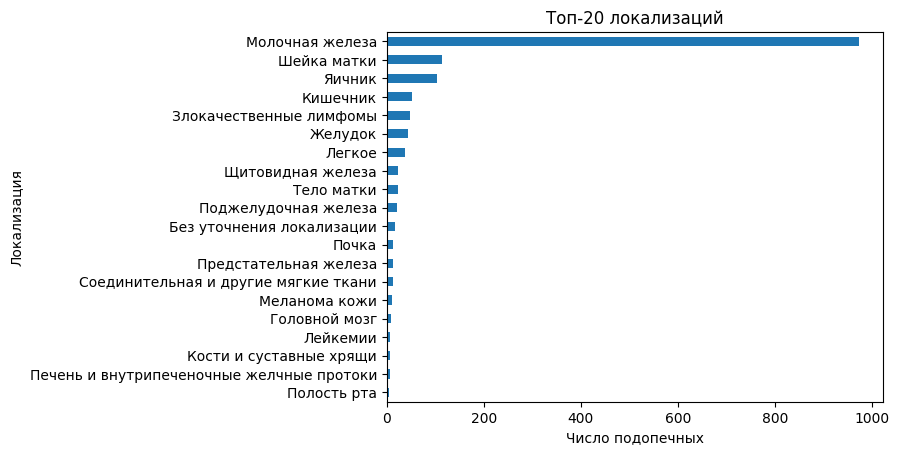

In [50]:
forms['diagnosis'].value_counts()[:20].sort_values().plot(kind='barh', 
                                                 title = '–¢–æ–ø-20 –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏–π', 
                                                 xlabel="–ß–∏—Å–ª–æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö", 
                                                 ylabel='–õ–æ–∫–∞–ª–∏–∑–∞—Ü–∏—è');

**–í—ã–¥–µ–ª–∏–º —Å—Ç–∞–¥–∏—é –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è –∏–∑ —Å—Ç–æ–±–ª—Ü–∞ "new_name"**

In [51]:
# –°–æ–∑–¥–∞–¥–∏–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –ø–æ–∏—Å–∫–∞ —Ä–∏–º—Å–∫–∏—Ö —Ü–∏—Ñ—Ä –æ—Ç I –¥–æ IV.
# –ò—â–µ–º —Å–Ω–∞—á–∞–ª–∞ 4, –∞ –ø–æ—Ç–æ–º 1, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è –æ—Ç 1 –¥–æ 3 —Ä–∞–∑
pattern_1 = re.compile(r'(IV|I{1,3})')

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–º–µ–Ω—ã —Ä–∏–º—Å–∫–∏—Ö —Ü–∏—Ñ—Ä –Ω–∞ –∞—Ä–∞–±—Å–∫–∏–µ
def replace_roman(match):
    return str(roman.fromRoman(match.group(0)))

In [52]:
pattern_2 = re.compile(r'(\d)\s*(?:—Å—Ç–∞–¥–∏—è|—Å—Ç)\b|\b(?:—Å—Ç–∞–¥–∏—è|—Å—Ç)\s*(\d)|\b(\d)(\D+|$)|(?:t|—Ç|—Ä—à–º)\s*(\d)',
                       re.IGNORECASE)

In [53]:
# –ò–∑–≤–ª–µ–∫–∞–µ–º —Ü–∏—Ñ—Ä—ã –∏–∑ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏ —Å—Ç–æ–ª–±—Ü–∞
forms['grade'] = forms['new_name'].progress_apply(lambda x: re.sub(pattern_1, replace_roman, x))\
.apply(lambda x: re.search(pattern_2, x).group(1) or 
       re.search(pattern_2, x).group(2) or 
       re.search(pattern_2, x).group(3) or 
       re.search(pattern_2, x).group(5) 
       if re.search(pattern_2, x) 
       else '–ù–µ —É–∫–∞–∑–∞–Ω–∞').str.extract(r'([1-4])')
# forms['grade'] = forms['grade'].str.extract(pattern_2, expand=False)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [00:00<00:00, 301889.77it/s]


In [54]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –∫ —Å—Ç–æ–ª–±—Ü—É 'new_name' –∏ –∏–∑–≤–ª–µ–∫–∞–µ–º –ø–µ—Ä–≤–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ
forms['grade'] = forms['new_name'].progress_apply(lambda x: re.sub(pattern_1, replace_roman, x))\
                                       .apply(lambda x: re.search(pattern_2, x).group(1) or 
                                                        re.search(pattern_2, x).group(2) or 
                                                        re.search(pattern_2, x).group(3) or 
                                                        re.search(pattern_2, x).group(5) 
                                                        if re.search(pattern_2, x) 
                                                        else '–ù–µ —É–∫–∞–∑–∞–Ω–∞')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1568/1568 [00:00<00:00, 303407.86it/s]


In [55]:
forms[['new_name', 'grade']].tail(60)
forms['grade'].unique()

array(['1', '–ù–µ —É–∫–∞–∑–∞–Ω–∞', '3', '2', '4', '5', '8', '0'], dtype=object)

In [56]:
# –∑–∞–º–µ–Ω—è–µ–º 5, 8 –∏ 0 –Ω–∞ "–Ω–µ —É–∫–∞–∑–∞–Ω–∞"
forms.loc[forms['grade'] == '5', 'grade'] = '–ù–µ —É–∫–∞–∑–∞–Ω–∞'
forms.loc[forms['grade'] == '8', 'grade'] = '–ù–µ —É–∫–∞–∑–∞–Ω–∞'
forms.loc[forms['grade'] == '0', 'grade'] = '–ù–µ —É–∫–∞–∑–∞–Ω–∞'

In [57]:
forms['grade'].unique()

array(['1', '–ù–µ —É–∫–∞–∑–∞–Ω–∞', '3', '2', '4'], dtype=object)

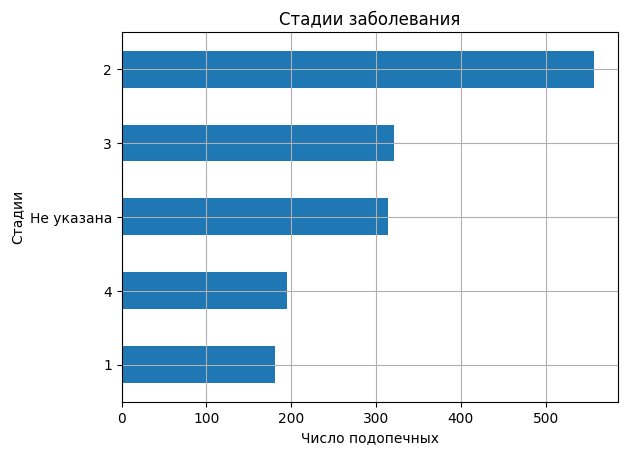

In [58]:
forms['grade'].value_counts().sort_values().plot(kind='barh', 
                                                 title = '–°—Ç–∞–¥–∏–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è', 
                                                 xlabel="–ß–∏—Å–ª–æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö", 
                                                 ylabel='–°—Ç–∞–¥–∏–∏',
                                                 grid =True);

**–í—ã–¥–µ–ª–∏–º –∫—Ç–æ –∑–∞–ø–æ–ª–Ω—è–ª –∞–Ω–∫–µ—Ç—É: –∑–∞ —Å–µ–±—è –∏–ª–∏ –∑–∞ 3 –ª–∏—Ü–æ**

In [59]:
substring = ['–º–∞–º–∞', '–º–∞–º—ã', '–º—É–∂', '—Å—É–ø—Ä—É–≥', '–¥–æ—á–µ', '–¥–æ—á—å', '–¥–æ—á–∫–∏', '–æ—Ç–µ—Ü', '–æ—Ç—Ü–∞', 
            '–ø–∞–ø—ã', '–ø–∞–ø–∞', '–¥—Ä—É–≥', '—Å—ã–Ω', '—Ç–µ—Ç—è', '—Ç–µ—Ç–∏', '–±–æ–ª–µ–µ—Ç', '—Å—ã–Ω', '–≤–Ω—É–∫', '—Å–µ—Å—Ç—Ä', '–±—Ä–∞—Ç']

In [60]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤—Ö–æ–∂–¥–µ–Ω–∏—è –≤—Å–µ—Ö –ø–æ–¥—Å—Ç—Ä–æ–∫
def check_substring(row):
    for sub in substring:
        if sub in row:
            return "–∑–∞ 3–µ –ª–∏—Ü–æ"
    return "–∑–∞ —Å–µ–±—è"

forms['applicant'] = forms['new_name'].apply(check_substring)

In [61]:
forms['applicant'].value_counts()

applicant
–∑–∞ —Å–µ–±—è       1496
–∑–∞ 3–µ –ª–∏—Ü–æ      72
Name: count, dtype: int64

**–û–ø—Ä–µ–¥–µ–ª—è–µ–º –≤–∏–¥ –ø–æ–º–æ—â–∏, —Ä–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "–ü–æ–º–æ—â—å"**

In [62]:
forms['–ü–æ–º–æ—â—å'].value_counts().to_frame()

count
–ü–æ–º–æ—â—å                                                          
–ù–µ —É–∫–∞–∑–∞–Ω–æ                                                   788
–ü—Å–∏—Ö–æ–ª–æ–≥–∏—á–µ—Å–∫—É—é                                               48
–û–±—â–µ–Ω–∏–µ                                                       22
–ü—Å–∏—Ö–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è                                               20
–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é                                                18
...                                                          ...
–Ø —Å—É–ø—Ä—É–≥–∞ –æ–Ω–∫–æ–±–æ–ª—å–Ω–æ–≥–æ                                         1
–°–æ–≤–µ—Ç –∫–∞–∫ –ø–æ–ø–∞—Å—Ç—å –≤ –ú–ù–ò–¶ –≥–µ–º–∞—Ç–æ–ª–æ–≥–∏–∏ –∏–ª–∏                       1
–ù–∞ –ª–µ—á–µ–Ω–∏–µ –º–∞–º–µ –≤ –ú–æ—Å–∫–≤–µ –ª–µ—á–µ–Ω–∏–µ —Å—Ç–æ–∏—Ç 1025000                 1
–£ –º—É–∂–∞ —Ä–∞–∫ –∫–∞—Ä–¥–∏–æ–æ—Ç–¥–µ–ª–∞ –∂–µ–ª—É–¥–∫–∞ 4—Å—Ç , –Ω—É–∂–Ω–∞ –º–∞—Ä—à—Ä—É—Ç–∏–∑–∞—Ü–∏—è      1
–ú–æ—Ä–∞–ª—å–Ω–∞—è –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞                           1

[540 rows x 1 columns]

In [63]:
#–°–æ—Å—Ç–∞–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å –≤—Ä—É—á–Ω—É—é - –ø—Ä–æ–≤–µ—Ä—è–µ–º, –∫–∞–∫ –∑–∞—è–≤–∏—Ç–µ–ª–∏ —É–∫–∞–∑—ã–≤–∞–ª–∏ —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π –≤–∏–¥ –ø–æ–º–æ—â–∏ –≤ –∞–Ω–∫–µ—Ç–µ
help_dict = {
    '–ù–µ —É–∫–∞–∑–∞–Ω–æ': ['–Ω–µ —É–∫–∞–∑–∞–Ω–æ'],
    '–ú–∞—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è' : ['–¥–µ–Ω–µ–∂', '–º–∞—Ç–µ—Ä–∏–∞–ª', '–ø–æ–¥–∞—Ä', '—Ç–∞–∫—Å–∏', '–æ–ø–ª–∞—Ç', '–≥—É–º–∞–Ω–∏—Ç–∞—Ä', '—Å—Ç–æ–∏—Ç', 
                      '—Ç—Ä–∞–Ω—Å—Ñ–µ—Ä', '–ø—Ä–æ–∂–∏–≤', '–¥–æ—Ä–æ–≥', '–º–µ–¥–∏–∫–∞–º–µ', '—Ä–µ–∫–æ–Ω—Å—Ç—Ä—É–∫', '—Ñ–∏–Ω–∞–Ω—Å', '–ø–æ–ª—É—á–∏', 
                      '—Ç–µ—Ä–∞–ø–∏', '–∂–∏–ª—å', '–æ–±—Å–ª–µ–¥–æ–≤', '–±–µ–ª—å', '–ø—Ä–æ—Ç–µ–∑', '—Ä—É–∫–∞–≤', '–±–∏–ª–µ—Ç', '–±—é—Å—Ç', '300'],
    '–Æ—Ä–∏–¥–∏—á–µ—Å–∫–∞—è' : ['—é—Ä–∏–¥–∏—á', '—é—Ä–∏—Å—Ç', '–∏–Ω–≤–∞–ª–∏–¥–Ω–æ—Å'],
    '–ü—Å–∏—Ö–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è' : ['–ø—Å–∏—Ö–æ–ª', '—ç–º–æ—Ü', '—Ç—Ä–µ–≤–æ–∂', '–æ–±—â–µ–Ω', '–º–æ—Ä–∞–ª', '–¥–æ—Å—É–≥', '–æ–±—â–∞—Ç', '—Å—Ç—Ä–∞—Ö', 
                         '—Å—Ç—Ä–∞—à', '–≥–æ–≤–æ—Ä', '–ø–æ–∑–∏—Ç–∏–≤', '–ø–æ–¥–¥–µ—Ä–∂', '—Ä–µ–∞–±–∏–ª–∏—Ç', '—Ä–∞–∑–æ–±—Ä–∞—Ç', '–ø–µ—Ä–µ–∫–ª—é—á–∏—Ç'],
    '–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è' : ['–∫–æ–Ω—Å—É–ª—å—Ç', '–∏–Ω—Ñ–æ', '—Å–æ–≤–µ—Ç', '–º–∞—Ä—à—Ä—É—Ç', '–æ–±–º–µ–Ω –æ–ø—ã—Ç', '–≥–¥–µ', '–æ—Ä–º–∞—Ü', '—Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü',
                        '–º–µ–¥–∏—Ü–∏–Ω', '–∫–∞–∫ ', '—á—Ç–æ', '–º–Ω–µ–Ω–∏', '–≤–∞—Ä–∏–∞–Ω—Ç', '–Ω–æ–≤–æ—Å—Ç', '—É–∑–Ω–∞', '–∑–Ω–∞–Ω', '–≤–æ–ø—Ä–æ—Å',
                        '–≤—Ä–∞—á', '–¥–æ–∫—Ç–æ—Ä', '–∫–æ–≥–¥–∞', '–º–æ–∂–Ω–æ', '–∫–æ–Ω—Ç–∞–∫—Ç', '–≥—Ä–∞–º–æ—Ç', '–Ω–∞–π—Ç–∏', '–ø—Ä–æ ', '–ª–∏–º—Ñ–æ',
                        '—ç–Ω–¥–æ–∫—Ä–∏–Ω'],
    '–£—á–∞—Å—Ç–∏–µ –≤ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è—Ö': ['–º–µ—Ä–æ–ø—Ä–∏—è—Ç', '–æ—á–Ω—ã', '–æ—á–Ω–æ', '–≤—Å—Ç—Ä–µ—á', '–Ω–µ–π—Ä–æ–≥—Ä–∞—Ñ', '–π–æ–≥', '–±–∞—Å—Å–µ–π–Ω',
                               '—Ç–∞–Ω—Ü', '—Å—Ç–∏–ª–∏—Å—Ç', '—Ñ–æ—Ç–æ'],
    '–õ—é–±–∞—è' : ['–ª—é–±–∞—è', '–ª—é–±—É—é', '–≤—Å–µ—Å—Ç–æ—Ä–æ–Ω', '–≤—Å—è–∫', '–ª—é–±–æ–π', '—Ä–∞–∑–Ω', '–≤—Å—é']
    }

In [64]:
new_column_values = []

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É —Å—Ç–æ–ª–±—Ü–∞
for value in forms['–ü–æ–º–æ—â—å']:
    # –ü—Ä–∏–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫ —Å—Ç—Ä–æ–∫–æ–≤–æ–º—É —Ç–∏–ø—É
    cleaned_value = str(value).strip().lower()
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –≤ —Å—Ç—Ä–æ–∫—É
    if any(substring in cleaned_value 
           for substring_list in help_dict.values() 
           for substring in substring_list):
        # –ï—Å–ª–∏ –µ—Å—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ, –¥–æ–±–∞–≤–ª—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∫–ª—é—á –≤ —Å–ø–∏—Å–æ–∫
        new_column_values.append(next((key for key, value_list in help_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # –ï—Å–ª–∏ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –Ω–µ—Ç
        new_column_values.append('–î—Ä—É–≥–∞—è')

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏–∑ —Å–ø–∏—Å–∫–∞
forms['help'] = new_column_values

In [65]:
forms[['–ü–æ–º–æ—â—å','help']].head(10)

–ü–æ–º–æ—â—å  \
0                                                                                                                 –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é   
1                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   
2  –î–µ–Ω–µ–∂–Ω—É—é. –ù–∞ –ª—É—á–µ–≤—É—é –µ—Ö–∞—Ç—å –≤ –¥—Ä—É–≥–æ–π –≥–æ—Ä–æ–¥. –ñ–∏–ª—å–µ, –¥–æ—Ä–æ–≥–∞, –µ–¥–∞ –≤—Å–µ –∑–∞ —Å–≤–æ–π —Å—á–µ—Ç.–í –•–∞–Ω—Ç–∞—Ö —è –ø—Ä–æ–±—É–¥—É –º–µ—Å—è—Ü. –ü–æ–º–æ–≥–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞.   
3                                                                     –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –∏ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Å—Ç—Ä–∞—Ö–æ–≤ , –ø–æ–ª–µ–∑–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.   
4                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   
5                                                                                                                          –¢–∞–Ω—Ü—ã   
6                                                          –•–æ—á—É –ø–æ–ª—É—á–∏—Ç—å –ª–µ—á–µ–Ω–∏–µ —Ö–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏–∏ –≤ –∏–Ω—Å—Ç–∏—Ç—É—Ç–µ –∏–º–µ–Ω–∏ –ì–µ—Ä—Ü–µ–Ω–∞ –≤ –ú–æ—Å–∫–≤–µ   
7                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   
8                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   
9                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   

                     help  
0          –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è  
1              –ù–µ —É–∫–∞–∑–∞–Ω–æ  
2            –ú–∞—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è  
3         –ü—Å–∏—Ö–æ–ª–æ–≥–∏—á–µ—Å–∫–∞—è  
4              –ù–µ —É–∫–∞–∑–∞–Ω–æ  
5  –£—á–∞—Å—Ç–∏–µ –≤ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è—Ö  
6            –ú–∞—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è  
7              –ù–µ —É–∫–∞–∑–∞–Ω–æ  
8              –ù–µ —É–∫–∞–∑–∞–Ω–æ  
9              –ù–µ —É–∫–∞–∑–∞–Ω–æ

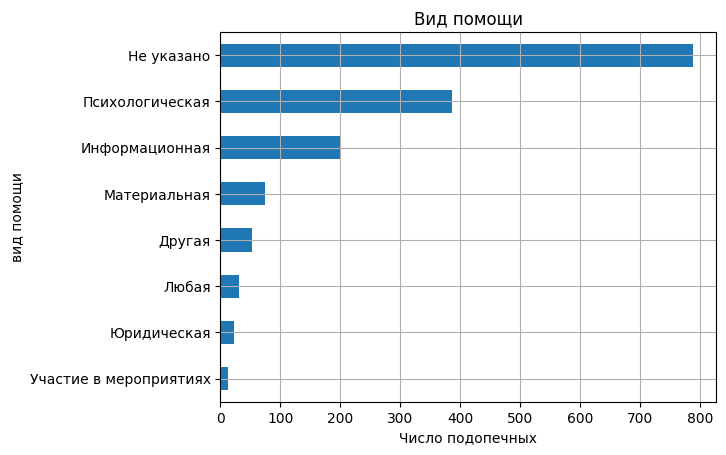

In [66]:
forms['help'].value_counts().sort_values().plot(kind='barh', 
                                           title = '–í–∏–¥ –ø–æ–º–æ—â–∏', 
                                           xlabel='–ß–∏—Å–ª–æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö', 
                                           ylabel='–≤–∏–¥ –ø–æ–º–æ—â–∏', 
                                           grid = True);

**–û–ø—Ä–µ–¥–µ–ª–∏–º —Å—Ñ–µ—Ä—É –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö, —Ä–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏"**

In [67]:
sorted(forms['–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏'].unique())

['-',
 '---',
 '3–¥ —Ö—É–¥–æ–∂–Ω–∏–∫',
 'Avon',
 'Digital, –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –¥–∏–∑–∞–π–Ω',
 'HR',
 'Hr',
 'IT —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏',
 'It —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç',
 'PR, –º–∞—Ä–∫–µ—Ç–∏–Ω–≥',
 '_',
 '–ê–≤—Ç–æ—Å–∞–ª–æ–Ω',
 '–ê–≥–µ–Ω—Ç –ø–æ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏',
 '–ê–¥–≤–æ–∫–∞—Ç',
 '–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä',
 '–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä –≤ –ø–æ–ª- –∫–µ',
 '–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–æ—Ä –≥–æ—Å—Ç–∏–Ω–∏—Ü—ã',
 '–ê–∫–∫–∞—É–Ω—Ç –ú–µ–Ω–µ–¥–∂–µ—Ä',
 '–ê–∫—Ç–∏–≤–Ω–∞—è, —Å–ø–æ—Ä—Ç–∏–≤–Ω–∞—è , –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è',
 '–ê–∫—É—à–µ—Ä–∫–∞',
 '–ê–∫—É—à–µ—Ä—Å—Ç–≤–æ',
 '–ê–Ω–∞–ª–∏—Ç–∏–∫',
 '–ê—Ä—Ö–∏–≤',
 '–ê—Ä—Ö–∏–≤–∞—Ä–∏—É—Å',
 '–ê—Ä—Ö–∏—Ç–µ–∫—Ç–æ—Ä –Ω–∞ –ø–µ–Ω—Å–∏–∏',
 '–ê—Ç–µ–ª—å–µ',
 '–ê—ç—Ä–æ–ø–æ—Ä—Ç',
 '–ë–∞–±—É—à–∫–∞',
 '–ë–∞–Ω–∫',
 '–ë–∞–Ω–∫–æ–≤—Å–∫–∞—è —Å—Ñ–µ—Ä–∞',
 '–ë–∞–Ω–∫–æ–≤—Å–∫–∏–π —Ä–∞–±–æ—Ç–Ω–∏–∫',
 '–ë–∞–Ω–∫–æ–≤—Å–∫–∏–π —Å–ª—É–∂–∞—â–∏–π',
 '–ë–∞–Ω–∫–æ–≤—Å–∫–∏–π —Å–æ—Ç—Ä—É–¥–Ω–∏–∫',
 '–ë–∞–Ω–∫–æ–≤—Å–∫–æ–µ –¥–µ–ª–æ',
 '–ë–µ–∑ —Ä–∞–±–æ—Ç–Ω–∞—è.',
 '–ë–µ–∑ —Ä–∞–±–æ—Ç—ã',
 '–ë–µ–∑—Ä–∞

In [68]:
# —Å–æ–∑–¥–∞–¥–∏–º —Å–ª–æ–≤–∞—Ä—å –∑–Ω–∞—á–µ–Ω–∏–π 
area_dict  = {
'IT, –∫–æ–º–ø—å—é—Ç–µ—Ä—ã, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç': ['it', '–∏—Ç ', '–≤–µ–±', 'web', '–ø—Ä–æ–≥—Ä–∞–º', '–∞–Ω–∞–ª–∏—Ç–∏–∫', '–∏—Ç'],
 '–ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è, —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–≤–µ–Ω–∞': ['–∏–Ω—Å–ø–µ–∫—Ç', '–∞–¥–º–∏–Ω–∏—Å—Ç—Ä', '–Ω–∞—á–∞–ª—å–Ω–∏–∫'],
 '–ë—É—Ö–≥–∞–ª—Ç–µ—Ä–∏—è, –∞—É–¥–∏—Ç': ['–±—É—Ö–≥–∞–ª—Ç–µ—Ä', '—ç–∫–æ–Ω–æ–º–∏', '–≥–∞–ª—Ç–µ—Ä', '–±—É—Ö', '—É—á–µ—Ç', '—Ä–µ–≤–∏–∑'],
 '–ì–æ—Å—Ç–∏–Ω–∏—á–Ω–æ-—Ä–µ—Å—Ç–æ—Ä–∞–Ω–Ω—ã–π –±–∏–∑–Ω–µ—Å, —Ç—É—Ä–∏–∑–º': ['—Ç—É—Ä–∏', '–≥–∏–¥', '–≥–æ—Å—Ç–∏–Ω', '–ø–µ–∫–∞—Ä', '–∫–æ—Ñ–µ', '–∫–∞—Ñ–µ', '—Ä–µ—Å—Ç–æ—Ä–∞–Ω', 
                                           '–æ—Ñ–∏—Ü–∏–∞–Ω','–æ–±—â–µ–ø–∏—Ç',  '–∫—É–ª–∏–Ω–∞—Ä', '–ø–æ–≤–∞—Ä', '–∫–æ–Ω–¥–∏—Ç', '–ø–∏—â–µ', 
                                           '–ø–∏—Ç–∞–Ω–∏', '–¥–µ—Å–µ—Ä—Ç', '–ø—Ä—è–Ω–∏', '—Å—ã—Ä–æ–≤–∞—Ä'],
 '–ì–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–∞—è –∏ –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–∞—è —Å–ª—É–∂–±–∞': ['—Å–ª—É–∂–∞', '–≤–æ–µ–Ω', '–º–∏–Ω–∏—Å—Ç–µ', '–≥–æ—Å', '—Å–ª—É–∂–±', '–ø–æ–ª–∏—Ü', '—á–∏–Ω–æ–≤', 
                                            '–≤–æ–π—Å–∫', '–≤–æ–∏–Ω'],
 '–î–∏–∑–∞–π–Ω, —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ': ['–¥–∏–∑–∞–π–Ω', '–≤–∏–¥–µ–æ', 'design', '–≥—Ä–∞—Ñ–∏', '—É–∫—Ä–∞—à', '–∏–ª–ª—é—Å—Ç—Ä', '—Ö—É–¥–æ–∂', '–≤—è–∑–∞–Ω', 
                        '–æ—Ä–≥–∞–Ω–∏–∑', '—Ç–≤–æ—Ä—á', '–≤—è–∂—É', '—Ñ–æ—Ç–æ'],
 '–ò–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏': ['–∫–æ–Ω—Å—Ç—Ä—É–∫—Ç', '–∏–Ω–∂–µ–Ω–µ—Ä', '–ø—Ä–æ–µ–∫—Ç–∏—Ä'],
 '–ö—Ä–∞—Å–æ—Ç–∞, —Ñ–∏—Ç–Ω–µ—Å, —Å–ø–æ—Ä—Ç': ['–∫—Ä–∞—Å–æ—Ç', '—Ç—Ä–µ–Ω–µ—Ä', '–∫–æ—Å–º–µ—Ç', '—à—É–≥–∞—Ä', '–º–∞—Å—Å–∞–∂', '–º–∞–∫–∏—è', '—Å—Ç–∏–ª', '–≤–∏–∑–∞–∂', 
                            '—Ä–µ—Å–Ω–∏—Ü', '–≤–æ–ª–æ—Å', '–±—å—é—Ç–∏', '–ø–µ—Ä–º–∞–Ω–µ–Ω—Ç', '–º–∞–Ω–∏–∫', '–ø–∞—Ä–∏–∫', '–Ω–æ–≥—Ç', '–ø–µ–¥–∏–∫—é',
                            '–º–µ–π–∫', '–±—Ä–æ–≤–∏','—Å–ø–æ—Ä—Ç', '—Ç—Ä–µ–Ω–∞–∂', '–π–æ–≥', '–¥–µ–ø–∏–ª'],
 '–ö—É–ª—å—Ç—É—Ä–∞, –º—É–∑—ã–∫–∞, —à–æ—É-–±–∏–∑–Ω–µ—Å': ['–∫—É–ª—å—Ç—É—Ä',  '–ø–µ–≤—á', '–ø–æ—é', '–º–æ–¥', '–±–ª–æ–≥', '—Ä–∞–∑–≤–ª–µ', '–∏–≤–µ–Ω—Ç', '—Ä–µ–∂–∏—Å—Å–µ—Ä', 
                                  '–º—É–∑—ã–∫–∞'],
 '–õ–æ–≥–∏—Å—Ç–∏–∫–∞, —Å–∫–ª–∞–¥, –í–≠–î': ['–≤—ç–¥', '–≤–Ω–µ—à–Ω–µ—ç–∫', '–ª–æ–≥–∏—Å—Ç', '–∫–ª–∞–¥'],
 '–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥, —Ä–µ–∫–ª–∞–º–∞, PR': ['–º–∞—Ä–∫–µ—Ç', 'pr', '—Ä–µ–∫–ª–∞–º'],
 '–ú–µ–¥–∏—Ü–∏–Ω–∞, —Ñ–∞—Ä–º–∞—Ü–µ–≤—Ç–∏–∫–∞': ['–º–µ–¥–∏—Ü', '–º–µ–¥—Å–µ—Å—Ç—Ä–∞', '–∑–¥—Ä–∞–≤–æ–æ—Ö', '—Ç–µ—Ä–∞–ø','—Ñ–µ–ª—å–¥—à–µ—Ä', '–∞–∫—É—à', '–≤—Ä–∞—á', '–¥–æ–∫—Ç–æ—Ä', 
                            '—Ñ–∞—Ä–º–∞—Ü', '–ø–æ–¥–æ–ª–æ–≥', '—Å—Ç–æ–º–∞—Ç–æ–ª', '–ø–µ–¥–∏–∞—Ç', '–∏–∞—Ç—Ä', '–º–µ–¥', '—Å–∞–Ω–∏—Ç–∞—Ä', '–ø—Ä–æ–≤–∏–∑–æ—Ä', 
                            '–º/—Å'],
 '–ù–∞ –ø–µ–Ω—Å–∏–∏': ['–ø–µ–Ω—Å–∏', '–±–∞–±—É—à'],
 '–ù–µ —Ä–∞–±–æ—Ç–∞—é': ['–Ω–µ—Ä–∞–±–æ—Ç', '–±–µ–∑—Ä–∞–±–æ—Ç', '–Ω–µ —Ä–∞–±–æ—Ç', '–º–Ω–æ–≥–æ–¥–µ—Ç', '–¥–µ–∫—Ä–µ—Ç', '–æ—Ç–ø—É—Å–∫', '–±–µ–∑ —Ä–∞–±–æ—Ç', '–¥–æ–º–∞', 
                '–¥–æ–º–æ', '–∏–Ω–≤–∞–ª–∏–¥', '–±–µ–∑—Ä–æ–±–æ—Ç', '–¥/—Ö', '–º–∞–º–∞'],
 '–ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å': ['—Ä–∏—ç–ª—Ç', '–Ω–µ–¥–≤–∏–∂', '–æ—Ü–µ–Ω—â–∏–∫'],
 '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –Ω–∞—É–∫–∞': ['–æ–±—Ä–∞–∑–æ–≤', '—à–∫–æ–ª', '–ª–æ–≥–æ–ø', '–¥–µ—Ñ–µ–∫—Ç', '–ø–µ–¥–∞–≥–æ–≥', '—É—á–∏—Ç', '–≤–æ—Å–ø–∏—Ç', '–º–µ—Ç–æ–¥–∏', '–¥–µ—Ç—Å–∫',
                        '–¥–µ—Ç—å–º–∏', '–±–∏–±–ª–∏–æ—Ç–µ–∫', '–ø—Ä–µ–ø–æ–¥', '—Ä–µ–ø–µ—Ç–∏—Ç', '–æ–±—É—á–µ–Ω'],
 '–û—Ö—Ä–∞–Ω–∞, –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å': ['–æ—Ö—Ä–∞–Ω–Ω', '–æ—Ö—Ä–∞–Ω–∞', '–±–µ–∑–æ–ø–∞—Å'],
 '–ü—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª—å, —Å–∞–º–æ–∑–∞–Ω—è—Ç—ã–π': ['–ø—Ä–µ–¥–ø—Ä–∏–Ω', 'avon', '—Å–µ—Ç–µ–≤', '—Ñ—Ä–∏–ª–∞–Ω—Å', '–æ–∫–æ–Ω–Ω—ã–π –±–∏–∑–Ω–µ—Å', '–∏–Ω–¥–∏–≤', '—Å–∞–º–æ–∑',
                                  '–∏–ø'],
 '–ü—Ä–æ–¥–∞–∂–∏, –∑–∞–∫—É–ø–∫–∏': ['–ø—Ä–æ–¥–∞–∂', '–∑–∞–∫—É–ø','–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç', '—Å–Ω–∞–±–∂–µ–Ω'],
 '–†–∞–±–æ—á–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ': ['–æ–ø–µ—Ä–∞—Ç–æ—Ä', '–¥–µ–∑–∏–Ω—Ñ–µ–∫', '–≥–∞–∑', '—Ç–µ—Ö–Ω–∏–∫',  '–º–µ—Ö–∞–Ω–∏–∫', '—Å—Ç–æ–ª—è—Ä', 
                                         '–ª–∞–±–æ—Ä–∞', '—ç–Ω–µ—Ä–≥–µ—Ç', '–º–∞—à–∏–Ω–æ—Å—Ç—Ä–æ–∏—Ç', '–ø—Ä–æ–º—ã—à', '—É–∫–ª–∞–¥—á–∏–∫', '—Ä–µ–º–æ–Ω—Ç', 
                                         '–ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ', '–∫—É–∑–Ω–µ—Ü', '—Ç–µ—Ö–Ω–∏', '–æ—Ç–¥–µ–ª–∫–∞', '–≥–µ–º–º–æ–ª–æ–≥', '—Ç–µ—Ö–Ω–æ–ª'],
 '–†–æ–∑–Ω–∏—á–Ω–∞—è —Ç–æ—Ä–≥–æ–≤–ª—è': ['—Ç–æ—Ä–≥–æ–≤', '—Ä–æ–∑–Ω–∏','–æ–ø—Ç–æ', '—Ç–∞–≤–æ—Ä–æ–≤–µ–¥', '–∫–∞—Å—Å–∏—Ä', '—Ç–æ–≤–∞—Ä–æ–≤–µ–¥', '–º–∞–≥–∞–∑–∏–Ω', '–ø—Ä–æ–¥–æ–≤–µ',
                        '–ø—Ä–æ–¥–∞–≤'],
 '–°–ú–ò, –∏–∑–¥–∞—Ç–µ–ª—å—Å—Ç–≤–æ, –ø–æ–ª–∏–≥—Ä–∞—Ñ–∏—è': ['—Ñ–∏–ª–æ–ª–æ–≥', '—Ç–µ–∫—Å—Ç', '–ª–∏–Ω–≥–≤', '–ø–∏—Å–∞—Ç', '–ø–æ–ª–∏–≥—Ä–∞—Ñ–∏—è', '–∂—É—Ä–Ω–∞–ª'],
 '–°–µ–∫—Ä–µ—Ç–∞—Ä–∏–∞—Ç, –¥–µ–ª–æ–ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ, –ê–•–û': ['1—Å', '–º–µ–Ω–µ–¥–∂',  '–∞—Ä—Ö–∏–≤', '—Å–µ–∫—Ä–µ—Ç–∞—Ä', '–æ—Ñ–∏—Å', '–¥–µ–ª–æ–ø—Ä–æ–∏–∑', '—Ö–æ–∑—è–π—Å—Ç–≤–µ–Ω'],
 '–°–µ–ª—å—Å–∫–æ–µ —Ö–æ–∑—è–π—Å—Ç–≤–æ, –∞–≥—Ä–æ–±–∏–∑–Ω–µ—Å, –∂–∏–≤–æ—Ç–Ω—ã–µ': ['—Ñ–µ—Ä–º', '—Ö–æ–∑—è–π—Å—Ç–≤–æ', '—Å–µ–ª—å—Å–∫', '–∂–∏–≤–æ—Ç–Ω', '–≤–µ—Ç–µ—Ä–∏–Ω', '–∑–æ–æ', 
                                              '–≥—Ä—É–º', '–ø—Ç–∏—Ü', '–±–∏–æ–ª–æ–≥', '—ç–∫–æ–ª–æ–≥', '–∑–∞–≤–æ–¥—á–∏–∫', '—Ä–∞—Å—Ç–∏–Ω–∏–µ–≤–æ–¥', 
                                              '—Å–∞–¥–æ–≤–æ–¥'],
 '–°—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ': ['—Å—Ç—Ä–∞—Ö–æ–≤'],
 '–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ, –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞, –ñ–ö–•': ['—Å—Ç—Ä–æ–∏—Ç–µ–ª',  '–∂–∫—Ö', '–∞—Ä—Ö–∏—Ç'],
 '–°—Ñ–µ—Ä–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è': ['–ø–µ—Ä–µ–≤–æ–¥—á–∏–∫', '–∫–æ–Ω—Å—É–ª—å—Ç', '–∫–æ–Ω—Å–∞–ª—Ç–∏–Ω–≥', '–≤–æ–¥–∏—Ç', '–∫–æ—É—á', '—à–≤–µ—è', '—à–≤–µ–π', '–∫—Ä–æ–π', 
                        '–∞—Ç–µ–ª—å–µ', '–æ–±—Å–ª—É–∂', '—É—Å–ª—É–≥', '—á–∏—Å—Ç', '–∫–æ–ª–ª', '—Å–∞–Ω—Ç–µ—Ö', '–ø—Å–∏—Ö–æ', '–±–∏–∑–Ω–µ—Å —Ç—Ä–µ–Ω–µ—Ä', 
                        '—Å–æ—Ü', '—Ñ–ª–æ—Ä–∏—Å—Ç', '—É–±–æ—Ä—â'],
 '–¢–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏ –∏ —Å–≤—è–∑—å': ['–¥–∏—Å–ø–µ—Ç—á', '–∫–æ–º–º—É–Ω–∏–∫–∞', '—Ç–µ–ª–µ–∫–æ–º', '—Å–≤—è–∑', '—Ç–µ–ª–µ—Ñ–æ–Ω', '–∫–æ–º–º—É–Ω–∞–ª—å'],
 '–¢–æ–ø-–º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç, —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ –≤—ã—Å—à–µ–≥–æ –∑–≤–µ–Ω–∞': ['—É–ø—Ä–∞–≤–ª–µ–Ω–µ—Ü', '—Ä—É–∫–æ–≤–æ–¥', '–≤–ª–∞–¥–µ', '–¥–∏—Ä–µ–∫—Ç'],
 '–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç, –∞–≤—Ç–æ–±–∏–∑–Ω–µ—Å': ['–∞–∑—Å', '–∞—ç—Ä–æ–ø–æ—Ä—Ç', '–º–∞—à–∏–Ω–∏—Å—Ç', '–∂–¥', '–¥–æ—Ä–æ–≥', '–¥–æ—Ä–æ–∂', '—Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç', '–∞–≤—Ç–æ', 
                           '–∫–æ–Ω–¥—É–∫—Ç–æ—Ä', '–∞–≤–∏–∞'],
 '–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º': ['–∫–∞–¥—Ä', 'hr', '—Ä–µ–∫—Ä—É—Ç'],
 '–£—á–∞—â–∏–π—Å—è, —Å—Ç—É–¥–µ–Ω—Ç': ['—Å—Ç—É–¥–µ–Ω—Ç', '—É—á—É—Å—å', '—É—á–∞—â'],
 '–§–∏–Ω–∞–Ω—Å—ã, –±–∞–Ω–∫–∏': ['—Ñ–∏–Ω', '–±–∞–Ω–∫'],
 '–Æ—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏—è': ['—é—Ä–∏', '–∞–¥–≤–æ–∫']}

In [69]:
new_column = []

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É —Å—Ç–æ–ª–±—Ü–∞
for values in forms['–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏']:
    # –ü—Ä–∏–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫ —Å—Ç—Ä–æ–∫–æ–≤–æ–º—É —Ç–∏–ø—É
    cleaned_value = str(values).strip().lower()
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –≤ —Å—Ç—Ä–æ–∫—É
    if any(substring in cleaned_value 
           for substring_list in area_dict.values() 
           for substring in substring_list):
        # –ï—Å–ª–∏ –µ—Å—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ, –¥–æ–±–∞–≤–ª—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∫–ª—é—á –≤ —Å–ø–∏—Å–æ–∫
        new_column.append(next((key for key, value_list in area_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # –ï—Å–ª–∏ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –Ω–µ—Ç
        new_column.append('–î—Ä—É–≥–∞—è')

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏–∑ —Å–ø–∏—Å–∫–∞
forms['activity'] = new_column

In [70]:
forms[['–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏', 'activity']].head(10)

–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏                               activity
0               –ë—É—Ö–≥–∞–ª—Ç–µ—Ä                     –ë—É—Ö–≥–∞–ª—Ç–µ—Ä–∏—è, –∞—É–¥–∏—Ç
1                –ú–µ–¥–∏—Ü–∏–Ω–∞                 –ú–µ–¥–∏—Ü–∏–Ω–∞, —Ñ–∞—Ä–º–∞—Ü–µ–≤—Ç–∏–∫–∞
2  –ü–µ–Ω—Å–∏–æ–Ω–µ—Ä –∏–Ω–≤–∞–ª–∏–¥ 3 –≥—Ä                              –ù–∞ –ø–µ–Ω—Å–∏–∏
3                –ú–µ–¥–∏—Ü–∏–Ω–∞                 –ú–µ–¥–∏—Ü–∏–Ω–∞, —Ñ–∞—Ä–º–∞—Ü–µ–≤—Ç–∏–∫–∞
4     –ú–µ–Ω–µ–¥–∂–µ—Ä –ø–æ —Ç—É—Ä–∏–∑–º—É  –ì–æ—Å—Ç–∏–Ω–∏—á–Ω–æ-—Ä–µ—Å—Ç–æ—Ä–∞–Ω–Ω—ã–π –±–∏–∑–Ω–µ—Å, —Ç—É—Ä–∏–∑–º
5       –ú–Ω–æ–≥–æ–¥–µ—Ç–Ω–∞—è –º–∞—Ç—å)                             –ù–µ —Ä–∞–±–æ—Ç–∞—é
6                –ú–µ–¥–∏—Ü–∏–Ω–∞                 –ú–µ–¥–∏—Ü–∏–Ω–∞, —Ñ–∞—Ä–º–∞—Ü–µ–≤—Ç–∏–∫–∞
7               –ë—É—Ö–≥–∞–ª—Ç–µ—Ä                     –ë—É—Ö–≥–∞–ª—Ç–µ—Ä–∏—è, –∞—É–¥–∏—Ç
8                 –£—á–∏—Ç–µ–ª—å               IT, –∫–æ–º–ø—å—é—Ç–µ—Ä—ã, –∏–Ω—Ç–µ—Ä–Ω–µ—Ç
9      –°–µ—Ç–µ–≤–∏–∫, –±—É—Ö–≥–∞–ª—Ç–µ—Ä                     –ë—É—Ö–≥–∞–ª—Ç–µ—Ä–∏—è, –∞—É–¥–∏—Ç

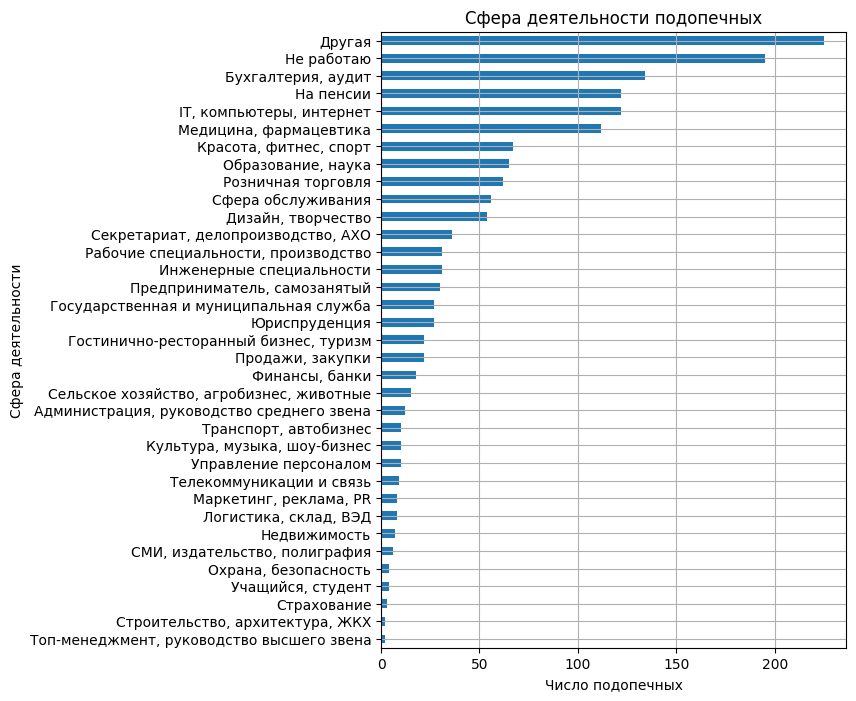

In [71]:
forms['activity'].value_counts().sort_values().plot(kind='barh', 
                                                title = '–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö', 
                                                xlabel='–ß–∏—Å–ª–æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö', 
                                                ylabel='–°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏', 
                                                grid = True,
                                                figsize=(6, 8));

**–í—ã–¥–µ–ª–∏–º —ç—Ç–∞–ø—ã –ª–µ—á–µ–Ω–∏—è, —Ä–∞–±–æ—Ç–∞–µ–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "–≠—Ç–∞–ø –ª–µ—á–µ–Ω–∏—è"**

In [72]:
# –∑–∞–≥—Ä—É–∑–∏–º —ç—Ç–∞–ø—ã –ª–µ—á–µ–Ω–∏–π –∏–∑ —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞
stage = pd.read_excel('/Users/daria/Documents/venv/–°–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∏ –¥–ª—è –ø—Ä–æ–µ–∫—Ç–∞ –†–∞–∫ –ü–æ–±–µ–¥–∏–º.xlsx', 
                      sheet_name= '–≠—Ç–∞–ø –ª–µ—á–µ–Ω–∏—è')
stages = stage['–≠—Ç–∞–ø –ª–µ—á–µ–Ω–∏—è'].to_list()
stages

['–ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–Ω–æ–∑–∞',
 '–•–∏—Ä—É—Ä–≥–∏—á–µ—Å–∫–æ–µ –ª–µ—á–µ–Ω–∏–µ',
 '–•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è',
 '–õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è',
 '–ì–æ—Ä–º–æ–Ω–∞–ª—å–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è',
 '–ò–º–º—É–Ω–æ—Ç–µ—Ä–∞–ø–∏—è',
 '–¢–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è',
 '–†–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è',
 '–†–µ–º–∏—Å—Å–∏—è',
 '–†–µ—Ü–∏–¥–∏–≤']

In [73]:
# –ø–µ—Ä–µ–≤–µ–¥–µ–º –ª–∏—Å—Ç –≤ –∫–ª—é—á–∏ —Å–ª–æ–≤–∞—Ä—è
stage_dict = dict.fromkeys(stages)
stage_dict

{'–ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–Ω–æ–∑–∞': None,
 '–•–∏—Ä—É—Ä–≥–∏—á–µ—Å–∫–æ–µ –ª–µ—á–µ–Ω–∏–µ': None,
 '–•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è': None,
 '–õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è': None,
 '–ì–æ—Ä–º–æ–Ω–∞–ª—å–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è': None,
 '–ò–º–º—É–Ω–æ—Ç–µ—Ä–∞–ø–∏—è': None,
 '–¢–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è': None,
 '–†–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è': None,
 '–†–µ–º–∏—Å—Å–∏—è': None,
 '–†–µ—Ü–∏–¥–∏–≤': None}

In [74]:
# –ø—Ä–æ–ø–∏—à–µ–º –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–ª—é—á–µ–π —Å–ª–æ–≤–∞—Ä—è
values_for_keys = [
    ['–¥–∏–∞–≥–Ω–æ–∑', '–æ–±—Å–ª–µ–¥', '—Ç–æ–ª—å–∫–æ', '–∫—Ç', '–Ω–µ –Ω–∞–∑–Ω', '–Ω–µ –Ω–∞—á', '–Ω–∞—á', '–ø–æ–∫–∞ –Ω–µ'],
    ['—Ö–∏—Ä—É—Ä–≥–∏—á', '–æ–ø–µ—Ä–∞'],
    ['—Ö–∏–º', '—Ö—Ç'],
    ['–ª—É—á–µ–≤'],
    ['–≥–æ—Ä–º'],
    ['–∏–º–º—É–Ω', '–∏–º—É–Ω', '—É–∫–æ–ª', '—Ç–∞–±–ª'],
    ['—Ç–∞—Ä–≥–µ—Ç'],
    ['—Ä–µ–∞–±–∏–ª–∏—Ç'],
    ['–∑–¥–æ—Ä–æ–≤', '—Ä–µ–º'],
    ['—Ä–µ—Ü']
]

stage_dict = {stage: values for stage, values in zip(stages, values_for_keys)}

In [75]:
stage_dict

{'–ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–Ω–æ–∑–∞': ['–¥–∏–∞–≥–Ω–æ–∑',
  '–æ–±—Å–ª–µ–¥',
  '—Ç–æ–ª—å–∫–æ',
  '–∫—Ç',
  '–Ω–µ –Ω–∞–∑–Ω',
  '–Ω–µ –Ω–∞—á',
  '–Ω–∞—á',
  '–ø–æ–∫–∞ –Ω–µ'],
 '–•–∏—Ä—É—Ä–≥–∏—á–µ—Å–∫–æ–µ –ª–µ—á–µ–Ω–∏–µ': ['—Ö–∏—Ä—É—Ä–≥–∏—á', '–æ–ø–µ—Ä–∞'],
 '–•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è': ['—Ö–∏–º', '—Ö—Ç'],
 '–õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è': ['–ª—É—á–µ–≤'],
 '–ì–æ—Ä–º–æ–Ω–∞–ª—å–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è': ['–≥–æ—Ä–º'],
 '–ò–º–º—É–Ω–æ—Ç–µ—Ä–∞–ø–∏—è': ['–∏–º–º—É–Ω', '–∏–º—É–Ω', '—É–∫–æ–ª', '—Ç–∞–±–ª'],
 '–¢–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è': ['—Ç–∞—Ä–≥–µ—Ç'],
 '–†–µ–∞–±–∏–ª–∏—Ç–∞—Ü–∏—è': ['—Ä–µ–∞–±–∏–ª–∏—Ç'],
 '–†–µ–º–∏—Å—Å–∏—è': ['–∑–¥–æ—Ä–æ–≤', '—Ä–µ–º'],
 '–†–µ—Ü–∏–¥–∏–≤': ['—Ä–µ—Ü']}

In [76]:
new_columnss = []

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É —ç–ª–µ–º–µ–Ω—Ç—É —Å—Ç–æ–ª–±—Ü–∞
for values in forms['–≠—Ç–∞–ø']:
    # –ü—Ä–∏–≤–æ–¥–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –∫ —Å—Ç—Ä–æ–∫–æ–≤–æ–º—É —Ç–∏–ø—É
    cleaned_value = str(values).strip().lower()
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ–π –ø–æ–¥—Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ª–æ–≤–∞—Ä—è –≤ —Å—Ç—Ä–æ–∫—É
    if any(substring in cleaned_value 
           for substring_list in stage_dict.values() 
           for substring in substring_list):
        # –ï—Å–ª–∏ –µ—Å—Ç—å —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ, –¥–æ–±–∞–≤–ª—è–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –∫–ª—é—á –≤ —Å–ø–∏—Å–æ–∫
        new_columnss.append(next((key for key, value_list in stage_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # –ï—Å–ª–∏ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π –Ω–µ—Ç
        new_columnss.append('–î—Ä—É–≥–∞—è')

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏–∑ —Å–ø–∏—Å–∫–∞
forms['steps'] = new_columnss

In [77]:
forms[['–≠—Ç–∞–ø','steps']].head(10)

–≠—Ç–∞–ø  \
0                                                 –†–µ–º–∏—Å—Å–∏—è   
1                                    –ï—â—ë –Ω–µ –Ω–∞—á–∞–ª–∞ –ª–µ—á–µ–Ω–∏–µ   
2                                          –õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è   
3  –ü—Ä–∏–Ω–∏–º–∞—é –≥–∞—Ä–º–æ–Ω –∏ –ø—Ä–æ—Ö–æ–∂—É —Ä–∞–∑ –≤ –≥–æ–¥ –ø–æ–ª–Ω–æ–µ –æ–±—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è   
4                                           –ì–æ—Ä–º–æ–Ω–æ—Ç–µ—Ä–∞–ø–∏—è   
5                             –¢–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è –¥–æ —Ñ–µ–≤—Ä–∞–ª—è   
6                                           –ü–æ—Å–ª–µ –æ–ø–µ—Ä–∞—Ü–∏–∏   
7                                             –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è   
8                                                 –†–µ–º–∏—Å—Å–∏—è   
9                        –ü–æ—Å–ª–µ –æ–ø–µ—Ä–∞—Ü–∏–∏, —Ç–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è   

                   steps  
0               –†–µ–º–∏—Å—Å–∏—è  
1    –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–Ω–æ–∑–∞  
2        –õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è  
3    –ü–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–Ω–æ–∑–∞  
4   –ì–æ—Ä–º–æ–Ω–∞–ª—å–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è  
5      –¢–∞—Ä–≥–µ—Ç–Ω–∞—è —Ç–µ—Ä–∞–ø–∏—è  
6  –•–∏—Ä—É—Ä–≥–∏—á–µ—Å–∫–æ–µ –ª–µ—á–µ–Ω–∏–µ  
7           –•–∏–º–∏–æ—Ç–µ—Ä–∞–ø–∏—è  
8               –†–µ–º–∏—Å—Å–∏—è  
9  –•–∏—Ä—É—Ä–≥–∏—á–µ—Å–∫–æ–µ –ª–µ—á–µ–Ω–∏–µ

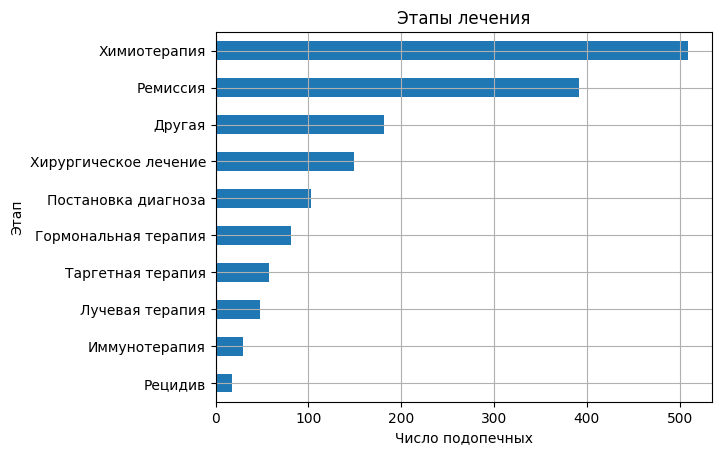

In [78]:
forms['steps'].value_counts().sort_values().plot(
                                                kind='barh', 
                                                title = '–≠—Ç–∞–ø—ã –ª–µ—á–µ–Ω–∏—è', 
                                                xlabel='–ß–∏—Å–ª–æ –ø–æ–¥–æ–ø–µ—á–Ω—ã—Ö', 
                                                ylabel='–≠—Ç–∞–ø', 
                                                grid = True);

In [79]:
# –ò—Ç–æ–≥–æ–≤–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º 
forms.head()

–§–ò–û       Email          –¢–µ–ª–µ—Ñ–æ–Ω –î–∞—Ç–∞ —Ä–æ–∂–¥–µ–Ω–∏—è  \
0  User_01_01  Email_0001  tel_number_0001    1969-11-15   
1  User_01_02  Email_0002  tel_number_0002    1982-08-20   
2  User_01_03  Email_0003  tel_number_0003    1976-06-09   
3  User_01_04  Email_0004  tel_number_0004    1960-12-19   
4  User_01_05  Email_0005  tel_number_0005    1967-07-09   

                       –ì–æ—Ä–æ–¥      –°—Ñ–µ—Ä–∞ –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏  \
0                  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä               –ë—É—Ö–≥–∞–ª—Ç–µ—Ä   
1  –≥. –ü—É—à–∫–∏–Ω –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥                –ú–µ–¥–∏—Ü–∏–Ω–∞   
2                –°—É—Ä–≥—É—Ç –•–ú–ê–û  –ü–µ–Ω—Å–∏–æ–Ω–µ—Ä –∏–Ω–≤–∞–ª–∏–¥ 3 –≥—Ä   
3             –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É                –ú–µ–¥–∏—Ü–∏–Ω–∞   
4            –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥     –ú–µ–Ω–µ–¥–∂–µ—Ä –ø–æ —Ç—É—Ä–∏–∑–º—É   

                                                  –î–∏–∞–≥–Ω–æ–∑  \
0                                          –†–ú–ñ, 1—Å —Å—Ç–∞–¥–∏—è   
1                                   –ú–∞–ª—å—Ç –ª–∏–º—Ñ–æ–º–∞ –∂–µ–ª—É–¥–∫–∞   
2                              –†–∞–∫ —à–µ–π–∫–∏ –º–∞—Ç–∫–∏ 3 –° —Å—Ç–∞–¥–∏–∏   
3  –†–ú–ñ, 1-–∞—è, —Å–¥–µ–ª–∞–ª–∞ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω–æ 2 –≥–æ–¥–∞ –∏ 9 –º–µ—Å—è—Ü–µ–≤ –Ω–∞–∑–∞–¥   
4                                                –†–ú–ñ, 2 –∞   

                                                      –≠—Ç–∞–ø  \
0                                                 –†–µ–º–∏—Å—Å–∏—è   
1                                    –ï—â—ë –Ω–µ –Ω–∞—á–∞–ª–∞ –ª–µ—á–µ–Ω–∏–µ   
2                                          –õ—É—á–µ–≤–∞—è —Ç–µ—Ä–∞–ø–∏—è   
3  –ü—Ä–∏–Ω–∏–º–∞—é –≥–∞—Ä–º–æ–Ω –∏ –ø—Ä–æ—Ö–æ–∂—É —Ä–∞–∑ –≤ –≥–æ–¥ –ø–æ–ª–Ω–æ–µ –æ–±—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è   
4                                           –ì–æ—Ä–º–æ–Ω–æ—Ç–µ—Ä–∞–ø–∏—è   

                                                                                                                          –ü–æ–º–æ—â—å  \
0                                                                                                                 –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é   
1                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   
2  –î–µ–Ω–µ–∂–Ω—É—é. –ù–∞ –ª—É—á–µ–≤—É—é –µ—Ö–∞—Ç—å –≤ –¥—Ä—É–≥–æ–π –≥–æ—Ä–æ–¥. –ñ–∏–ª—å–µ, –¥–æ—Ä–æ–≥–∞, –µ–¥–∞ –≤—Å–µ –∑–∞ —Å–≤–æ–π —Å—á–µ—Ç.–í –•–∞–Ω—Ç–∞—Ö —è –ø—Ä–æ–±—É–¥—É –º–µ—Å—è—Ü. –ü–æ–º–æ–≥–∏—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞.   
3                                                                     –£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –∏ –∏–∑–±–∞–≤–∏—Ç—å—Å—è –æ—Ç —Å—Ç—Ä–∞—Ö–æ–≤ , –ø–æ–ª–µ–∑–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.   
4                                                                                                                     –ù–µ —É–∫–∞–∑–∞–Ω–æ   

                                                              –ì—Ä—É–ø–ø—ã  ...  \
0                                                 –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù  ...   
1  #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù; –ê–Ω–æ–Ω—Å—ã –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏; –î–∞—Ä–∏ –≠–º–æ—Ü–∏–∏  ...   
2                                                 –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù  ...   
3                      #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù; –î–∞—Ä–∏ –≠–º–æ—Ü–∏–∏  ...   
4                                   #–õ–æ–≤–ª—é–≠–º–æ—Ü–∏–∏; –ö–ª—É–± ‚Äú–†–∞–∫ –ü–æ–±–µ–¥–∏–º‚Äù  ...   

              city city_score        diagnosis diagnosis_score  \
0        –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä        100  –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞             100   
1  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥         90          –ñ–µ–ª—É–¥–æ–∫             100   
2           –°—É—Ä–≥—É—Ç         90      –®–µ–π–∫–∞ –º–∞—Ç–∫–∏             100   
3   –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É        100  –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞             100   
4  –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥        100  –ú–æ–ª–æ—á–Ω–∞—è –∂–µ–ª–µ–∑–∞             100   

                                                 new_name       grade  \
0     

In [80]:
# —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≥–æ—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é
forms.to_csv('/Users/daria/Documents/venv/forms.csv', index=False)